In [ ]:
import pandas as pd
import shutil
import numpy as np 
import seaborn as sns 
import glob
import os 
from datetime import *
import seaborn as sns
import copy
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import plotly.express as px

Upload all geo file , which can be downloaded form (put name of geographic website), upload all the file in github repo and then copy and paste the link below. 
Important note: please do not change the file name of excel 

In [ ]:
#@title 
#above string is used to hide code block
#PLEASE SEE FOLLOWING TEXT BLOCK FOR EXPLANATION OF THIS CODE CELL!!!

'''
Purpose: Adds date_only and time_only columns to dataframe
Column values are filled based on 'DateTime Column'
This DIRECTLY changes the dataframe, it does NOT return a copy
@param df : a dataframe, this will be a file consisting of data
  from each pod pooled together
'''
def add_dates_times_columns(df):
  # insert date only, time only, and DateTime Columns
  # adding a filler value x or y that will be replaced later
  df.insert(1, 'date_only', 'x')
  df.insert(2, 'time_only', 'y')
  
  # change name of Time column to datetime for clarity that it is a datetime
  df.rename(columns={'Time' : 'DateTime'}, inplace=True)
  #copy string of DateTime to time and date only columns
  df['date_only'] = df['DateTime']
  df['time_only'] = df['DateTime']

  # convert strings to appropriate data type - DateTime, date, and time
  df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
  df['date_only'] = pd.to_datetime(df['date_only']).dt.date
  df['time_only'] = pd.to_datetime(df['time_only']).dt.time

  # resetting index to make it look neat
  df.reset_index(drop=True, inplace=True)

def cardinal_direction(df): 
  condition_list = [(df['Wind Direction'] > 0) & (df['Wind Direction'] < 45), (df['Wind Direction'] == 45), 
                    (df['Wind Direction'] > 45) & (df['Wind Direction'] <= 90), (df['Wind Direction'] > 90) & (df['Wind Direction'] < 135), (df['Wind Direction'] == 135), 
                    (df['Wind Direction'] > 135) & (df['Wind Direction'] <= 180), (df['Wind Direction'] > 180) & (df['Wind Direction'] < 225), (df['Wind Direction'] == 225), 
                    (df['Wind Direction'] > 225) & (df['Wind Direction'] <= 270), (df['Wind Direction'] > 270) & (df['Wind Direction'] < 315), (df['Wind Direction'] == 315), 
                    (df['Wind Direction'] > 315) & (df['Wind Direction'] <= 360) ]
  choicelist = ['North','North-East', 'East', 'East', 'South-East', 'South', 'South', 'South-West', 'West', 'West', 'North-West', 'North']
  
  df['Cardinal Direction'] = np.select(condition_list, choicelist) #adding the cardinal direction column
  direction_values=df['Cardinal Direction'].values #to get the values either as array or a series
  
  df.drop(['Cardinal Direction'], axis=1, inplace=True) # we need to drop the column to relocate to the position we want
  df.insert(15,'Cardinal Direction',value=direction_values)
  return df # to return the dataframe when the function is called\

'''
Purpose: The get_weather_master function more than just the necessary
  weather data and adds them to the google colab local files.
  This function will remove unnecssary files in order to save 
  memory/space in the local colab session.
'''
def clean_up():
  shutil.rmtree('/content/stinky/data', ignore_errors=True)
  shutil.rmtree('/content/stinky/vessels_data', ignore_errors=True)
  os.remove('/content/stinky/2021 SMRO VESSEL ARRIVALS.csv')
  os.remove('/content/stinky/Geo_dataset.ipynb')
  os.remove('/content/stinky/README.md')
  os.remove('/content/stinky/call_notes.md') 
  os.remove('/content/stinky/oil_vessel_dataset.ipynb')
  os.remove('/content/stinky/text_analysis_caroline.ipynb')
  os.remove('/content/stinky/SCF ODOR REPORT 1-1-20 to 6-3-21.xlsx')
  os.remove('/content/stinky/stinky_dataset.ipynb')
  os.remove('/content/stinky/2020 SMRO VESSEL ARRIVALS.csv')


def get_weather_master():
  shutil.rmtree('/content/stinky', ignore_errors=True)
  !git clone https://github.com/ds5110/stinky

  path = 'stinky/weather_data_raw/'
  lst = os.listdir(path)

  df= pd.DataFrame()
  df_new= pd.DataFrame()

  for i in lst:
    url = path+i
    if i[-4:]==".csv":
      if df.empty==True :
        df = pd.read_csv(url)
        df["Pod Name"] = i[:5]
      else:
        df_new= pd.read_csv(url)
        df_new["Pod Name"]= i[:5]
        df= df.append(df_new)

  add_dates_times_columns(df)
  df = cardinal_direction(df)

  df = df.sort_values(by=['Pod Name','DateTime'])
  df.reset_index(drop=True, inplace=True)
  df.rename(columns={'DateTime':'Date & time (hour rounded)', 
                     'date_only':'date', 'time_only':'time (hour rounded)'}
            , inplace=True)
  clean_up()

  return df



The most important function that we will be relying upon in the above code cell is get_weather_master(). The rest are helper functions. This function will get the master weather dataframe.

In [ ]:
df_weather_master = get_weather_master()
df_weather_master

Cloning into 'stinky'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 324 (delta 155), reused 67 (delta 21), pack-reused 0
Receiving objects: 100% (324/324), 2.84 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (155/155), done.


,Date & time (hour rounded),date,time (hour rounded),Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Leaf Wetness (Minutes),Solar Radiation Avg,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,UV Index,Station Voltage,Station Voltage 2,t1ia,t1il,t1ih,t2ia,t2il,t2ih,wetbulb,s2ia,smia,lvl1,lvl2,lvl3,Pod Name
0,2020-09-02 12:00:00,2020-09-02,12:00:00,75.00,75.0,75.0,60.0,60.0,60.0,29.97,29.97,29.98,0.00000,0.0,157.0,South,0.00,NaN,NaN,66.51,65.0,69.0,75.00,75.0,60.2,NaN,6.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.7,NaN,NaN,NaN,NaN,NaN,SMRO3
1,2020-09-02 13:00:00,2020-09-02,13:00:00,75.16,75.0,75.2,59.0,58.0,60.0,29.96,29.95,29.98,0.00000,0.0,157.0,South,0.00,NaN,NaN,73.92,69.0,75.0,75.16,75.2,59.8,NaN,6.504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3
2,2020-09-02 14:00:00,2020-09-02,14:00:00,75.41,75.2,75.5,58.0,58.0,58.0,29.94,29.93,29.95,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.98,74.0,75.0,75.41,75.4,59.6,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3
3,2020-09-02 15:00:00,2020-09-02,15:00:00,75.32,75.2,75.4,59.0,58.0,59.0,29.91,29.90,29.93,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.95,74.0,75.0,75.32,75.3,59.9,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.4,NaN,NaN,NaN,NaN,NaN,SMRO3
4,2020-09-02 16:00:00,2020-09-02,16:00:00,75.47,75.2,75.7,59.0,59.0,59.0,29.89,29.88,29.90,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.90,74.0,75.0,75.47,75.5,60.1,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,NaN,NaN,NaN,NaN,NaN,SMRO3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,2021-07-23 20:00:00,2021-07-23,20:00:00,64.32,63.7,64.7,75.0,70.0,81.0,30.14,30.13,30.15,2.03667,7.2,111.0,East,0.01,NaN,NaN,82.77,82.0,83.0,64.32,64.3,56.3,NaN,6.866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,NaN,NaN,NaN,SMRO7
23523,2021-07-23 21:00:00,2021-07-23,21:00:00,63.51,62.7,64.0,81.0,80.0,83.0,30.13,30.12,30.15,3.15167,9.3,283.0,West,0.00,NaN,NaN,82.28,82.0,83.0,63.51,63.5,57.5,NaN,6.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.8,NaN,NaN,NaN,NaN,NaN,SMRO7
23524,2021-07-23 22:00:00,2021-07-23,22:00:00,62.94,62.7,63.1,81.0,79.0,83.0,30.15,30.14,30.15,3.17167,9.5,315.0,North-West,0.00,NaN,NaN,82.00,82.0,82.0,62.94,62.9,57.1,NaN,6.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,NaN,NaN,NaN,SMRO7
23525,2021-07-23 23:00:00,2021-07-23,23:00:00,62.57,62.0,63.0,80.0,79.0,80.0,30.14,30.14,30.15,4.81667,11.0,317.0,North,0.00,NaN,NaN,82.00,82.0,82.0,62.57,62.6,56.2,NaN,6.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN,SMRO7


In [ ]:
# why is there wind direction of type NaN? no wind direction measured?
q = df_weather_master[df_weather_master['Cardinal Direction'] == '0']
q


,Date & time (hour rounded),date,time (hour rounded),Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Leaf Wetness (Minutes),Solar Radiation Avg,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,UV Index,Station Voltage,Station Voltage 2,t1ia,t1il,t1ih,t2ia,t2il,t2ih,wetbulb,s2ia,smia,lvl1,lvl2,lvl3,Pod Name
4464,2021-03-08 17:00:00,2021-03-08,17:00:00,35.50,35.5,35.5,50.0,51.0,51.0,30.32,30.32,30.32,3.20000,3.2,NaN,0,0.00,NaN,NaN,70.90,71.0,71.0,35.50,35.5,18.7,NaN,1.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN,NaN,NaN,SMRO3
4465,2021-03-08 18:00:00,2021-03-08,18:00:00,33.86,33.7,34.1,57.0,57.0,58.0,30.32,30.32,30.32,5.99048,7.7,NaN,0,0.00,NaN,NaN,69.90,70.0,70.0,33.86,40.9,20.1,NaN,2.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2,NaN,NaN,NaN,NaN,NaN,SMRO3
4466,2021-03-08 19:00:00,2021-03-08,19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMRO3
4467,2021-03-08 20:00:00,2021-03-08,20:00:00,31.80,31.8,31.8,63.0,64.0,64.0,30.34,30.34,30.34,5.00000,5.0,NaN,0,0.00,NaN,NaN,70.90,71.0,71.0,31.80,42.1,20.7,NaN,1.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,NaN,NaN,NaN,NaN,SMRO3
4468,2021-03-08 21:00:00,2021-03-08,21:00:00,30.10,30.1,30.1,64.0,65.0,65.0,30.33,30.33,30.33,1.60000,1.6,NaN,0,0.00,NaN,NaN,70.90,71.0,71.0,30.10,30.1,19.4,NaN,0.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.7,NaN,NaN,NaN,NaN,NaN,SMRO3
4470,2021-03-08 23:00:00,2021-03-08,23:00:00,29.10,29.1,29.1,61.0,62.0,62.0,30.30,30.30,30.31,1.94667,2.6,NaN,0,0.00,NaN,NaN,70.90,71.0,71.0,29.10,29.1,17.4,NaN,1.633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.4,NaN,NaN,NaN,NaN,NaN,SMRO3
4471,2021-03-09 00:00:00,2021-03-09,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMRO3
4472,2021-03-09 01:00:00,2021-03-09,01:00:00,31.86,31.6,32.2,49.0,50.0,51.0,30.29,30.29,30.29,3.11429,3.5,NaN,0,0.00,NaN,NaN,70.33,70.0,71.0,31.86,31.9,15.1,NaN,2.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,NaN,NaN,NaN,NaN,NaN,SMRO3
4473,2021-03-09 02:00:00,2021-03-09,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMRO3
4474,2021-03-09 03:00:00,2021-03-09,03:00:00,32.70,32.7,32.7,53.0,54.0,54.0,30.25,30.25,30.25,1.80000,1.8,NaN,0,0.00,NaN,NaN,70.90,71.0,71.0,32.70,32.7,17.5,NaN,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,NaN,NaN,NaN,NaN,SMRO3


In [ ]:
#@title 
#PLEASE SEE FOLLOWING TEXT BLOCK FOR EXPLANATION OF THIS CODE CELL!!!
'''
Purpose : A helper function to weather_df_interval_groupby_for_plot.
    This remove columns with all values that are NA
@param df_weather_master : dataframe, the weather master dataframe
    i.e. the return value of get_weather_master()
return: dataframe, a processed copy of the weather master
'''
def column_process_weather_df(df_weather_master):
  df_copy = df_weather_master.copy()
  df_copy =df_copy.dropna(axis=1, how='all')
  df_copy.pop('date')
  df_copy.pop('time (hour rounded)')

  return df_copy


'''
Purpose: A helper function for aggregation in weather_df_process_for_plotting
    This is used to get mode of cardinal directions for any time interval
@param: a pandas series containing strings of cardinal directions
@return: a string representation of the mode
'''
def determine_direction_mode(df_column):
  df_mode = df_column.mode()
  if (len(df_mode.index) > 1):
    return 'None'
  else:
    return df_mode


'''
Purpose: To create a datetime object from date values as integers
This is a helper function to get_weather_info_helper
@param day_int : an integer representing the numerical day
@param month_int : an integer representing the numerical month i.e. January is 1
@param year_int : the year represented as a 4 digit integer i.e. 2020
@param time : A boolean, set to False by default. Set true if looking at a particular hour
@param hour_int : an integer representing the hour in military time (0-23) where 23 = 11:OO PM
@ return : a datetime object representing the data values entered

'''
def convert_val_to_dt(day_int, month_int, year_int, time = False, hour_int = 0):
    if time == False:
        x = datetime(year = year_int, month = month_int, day = day_int, hour = 0, minute = 0, second = 0, microsecond = 0)
    else:
        x = datetime(year = year_int, month = month_int, day = day_int, hour = hour_int, minute = 0, second = 0, microsecond = 0)
    return x


'''
Purpose: A helper function to weather_df_interval_groupby_for_plot
    This groups the dataframe by key - weekly, monthly, or daily
    * daily actually does not meaure in months but in chunks of 30 days
    which is almost a month
@param df: a dataframe, weather master 
    i.e. the return value of get_weather_master()
@param key: a string of the grouping requested, 
    must be 'hours','days','weeks', or'months'
@return: dataframe, a processed dataframe that removes columns with all NA
and is grouped by user choice
'''
def weather_df_process_for_plotting(df : pd.DataFrame, key : str, interval = 1):
  options = ['hours','days','weeks','months']
  
  if interval <=0 or not isinstance(interval, int):
    raise ValueError("Interval must be a positive non-zero integer")
  
  key = key.lower()

  if key not in options:
    raise ValueError("Key must be a string: hours, days, weeks, or months")
  
  week_interval = str(interval * 7) + 'D'
  month_interval = str(interval * 30) + 'D'
  day_interval = str(interval * 1) + 'D'
  hour_interval = str(interval * 1) + 'H'

  dict_options = {'hours': hour_interval, 'days' : day_interval, 'weeks' : week_interval, 'months' : month_interval}

  
  df_copy = df.copy()

  interval_key = dict_options[key]
  
  try:
    df_copy.insert(loc=1, column='DateTime interval',value= 5)
  except:
    exception = 1
  
  df_copy['DateTime interval'] = df_copy['Date & time (hour rounded)'].dt.floor(interval_key)

  df_copy['Cardinal Direction'] = df_copy['Cardinal Direction'].replace('0', 'Not-measured')
  df_copy['Pod Name'] = df_copy['Pod Name'].astype(str)

  try:
    df_copy.pop(item='Date & time (hour rounded)')
  except:
    exception = 1

  list_col = list(df_copy.columns)

  dict_agg = {}

  for i in list_col:
    if i == 'DateTime interval':
       continue
    elif i == 'Cardinal Direction':
      dict_agg[i] = lambda x: determine_direction_mode(x)
    elif i == 'Pod Name':
      dict_agg[i] = lambda y : y.mode()
    else:
      dict_agg[i] = 'mean'

  all_pods = list(df_copy['Pod Name'].unique())
  df_list = []

  for pod in all_pods:
    df_iter = df_copy[df_copy['Pod Name'] == pod]
    df_iter = df_iter.groupby(by=['DateTime interval']).agg(dict_agg)
    df_list.append(df_iter)
    
  final = pd.concat(df_list)
  return final

'''
Purpose: A helper function to display_weather_EDA 
    Groups the master weather dataframe by user choice
    by key - weekly, monthly, or daily. Keeps the pods separate though.
@param df : a dataframe, this should be the master weather dataframe.
    i.e. the return value of get_weather_master()
@param key : a string value, the way to aggregate the data.
    Must be 'hours','days','weeks', or 'months'.
@ param interval : an integer, the quantity for aggregation.
    i.e. if you want to aggregate by intervals of 3 days then key = 'days', interval = 3
'''
def weather_df_interval_groupby_for_plot(df : pd.DataFrame, key : str, interval = 1)->pd.DataFrame:
  df = column_process_weather_df(df)
  return weather_df_process_for_plotting(df, key, interval=interval)

'''
Purpose: A helper function to display_weather_EDA
    Creates two graphs index vs. EDA to visualize and 
    datetime vs. EDA to visualize
@param df_weather_processed : a dataframe, the processed weather dataframe
    i.e. it should be the return value of weather_df_interval_groupby_for_plot
@param plot_type : a string representing the kind of plot to graph 
    'scatter' and 'plot' are the only valid plot_type values
@return: void, will print out the graphs
'''
def weather_EDA(df_weather_processed, plot_type : str):

  valid_plot_types = ['line', 'scatter']

  if (plot_type not in valid_plot_types):
    raise ValueError("plot_type must be 'line' or 'scatter'")

  sns.set()
  sns.set(rc={'figure.figsize':(20,10)})

  EDA_list_visualize = ['Temp Avg', 'Hum Avg','Baro Avg','Windspeed','Gust','Interval Precip','Dew Point','Heat Index','Wind Chill']

  index_key = 'DateTime interval'
  df_weather_processed = df_weather_processed.sort_values(by=['Pod Name'])
  df_weather_processed_reset = df_weather_processed.reset_index(drop=True).index
  id = df_weather_processed.reset_index(drop=True).index

  if plot_type == 'line':
    for i in EDA_list_visualize:
      fig, ax =plt.subplots(1,2)
      sns.lineplot(data = df_weather_processed.reset_index(drop=True), x=id , y = i, hue='Pod Name',  ax=ax[0] )
      sns.lineplot(data = df_weather_processed, x = index_key  , y = i, hue='Pod Name',  ax=ax[1] )
      plt.xticks(rotation=90)        
      fig.show()
  elif plot_type == 'scatter':
    for i in EDA_list_visualize:
      fig, ax =plt.subplots(1,2)
      sns.scatterplot(data = df_weather_processed.reset_index(drop=True), x = id  , y = i, hue='Pod Name',  ax=ax[0] )
      sns.scatterplot(data = df_weather_processed, x = index_key  , y = i, hue='Pod Name',  ax=ax[1] )
      plt.xticks(rotation=90)
      fig.show()

'''
Purpose: Calls the function that will created weather/data visualization
@param df_weather_master : the master weather dataframe
@param plot_type : a string representing the type of plot to visualize - 
  only 'scatter' and 'line' are valid options for now
  **In the future allow for different plot types
@param key : a string - must be 'hours', 'days', 'weeks', 'months'
@param interval : an integer, a multiplier for the key interval chosen, defaults to 1
@return : void, displays graph
'''
def display_weather_EDA(df_weather_master, plot_type : str, key : str,interval_qty = 1):
  df_to_plot = weather_df_interval_groupby_for_plot(df_weather_master, key, interval_qty)
  weather_EDA(df_to_plot, plot_type)

The most important function that we will be relying upon in the above code cell is gdisplay_weather_EDA(df_weather_master, plot_type : str, key : str,interval_qty = 1). The rest are helper functions. Please see function docstring for more information on parameters.  

This function wil display an plots that show the distribution of the data over time and by pods (SMRO3, SMRO4 etc..). 

The graphs on the right plot the measurements over time. The graph on the left plots the measurement, but uses the index - meaning its useful for seeing the
breadth of the measurments of the pods. You can see the orange is shorter in width compared to the other colors indicating SMRO4 has been running for a shorter time period then the other pods. This info is hard to look at when looking at the chart on the right

In [ ]:
#Note ask about humidity outlier for SMRO4 
#display_weather_EDA(df_weather_master, 'scatter', 'hours')

In [ ]:
#display_weather_EDA(df_weather_master, 'scatter', 'hours', interval_qty=12)

In [ ]:
#Were the locations of the pods moved before 02/2021
#display_weather_EDA(df_weather_master,'line', 'hours')

In [ ]:
#x = weather_df_interval_groupby_for_plot(df_weather_master, 'hours')
#x

In [ ]:
# Were some pods shut down or moved, it looks like there is a gap in measurement sfor SMRO4, SMRO6, SMRO7
#display_weather_EDA(df_weather_master, 'line', 'hours')

In [ ]:
#@title 
'''
Purpose: A helper function to get_smell_df_master
    This imports smell my city data csv
    and adds datetime columns.
@return: a dataframe of the smell my city data
'''
def get_smc():
  url_all_zips = 'https://raw.githubusercontent.com/caro28/ds5110_project/main/smell_reports_all_zipcodes.csv'
  df_smc = pd.read_csv(url_all_zips)

  # Chnaging the date and time column to datetime format
  df_smc['date & time']=df_smc['date & time'].str[0:20]
  df_smc['date & time']=pd.to_datetime(df_smc['date & time'])
  # Creating separate columns for date and time
  df_smc['date'] = [d.date() for d in df_smc['date & time']]
  df_smc['time'] = [d.time() for d in df_smc['date & time']]  
  
  # Creating a date and hour column
  df_smc['Date & time (hour rounded)'] = df_smc['date & time'].dt.strftime("%Y-%m-%d %H:00:00")

  # renaming columns
  df_smc.rename(columns={'skewed latitude':'Latitude', 'skewed longitude':'Longitude'}, inplace=True)

  return df_smc

'''
Purpose: A helper function to get_smell_df_master
    This imports see clickfix data csv
    and add datetime columns.
@return: a dataframe of the see click fix data
'''
def get_scf():
  url = 'https://raw.githubusercontent.com/caro28/ds5110_project/main/SCF%20ODOR%20REPORT%201-1-20%20to%206-3-21.csv'
  df_scf = pd.read_csv(url)

  # Changing the date and time column to datetime format
  df_scf['Created at local']=pd.to_datetime(df_scf['Created at local'])
  df_scf['Closed at local']=pd.to_datetime(df_scf['Closed at local'])

  # Creating separate columns for date and time
  df_scf['date'] = [d.date() for d in df_scf['Created at local']]
  df_scf['time'] = [d.time() for d in df_scf['Created at local']]

  # Creating a date and hour column (using the 'Created at local' column)
  df_scf['Date & time (hour rounded)'] = df_scf['Created at local'].dt.strftime("%Y-%m-%d %H:00:00") 

  # renaming columns
  df_scf.rename(columns={'Description':'smell description', 'Lat':'Latitude', 'Lng':'Longitude'}, inplace=True) 
  return df_scf

'''
Purpose: A heplper function to get_smell_df_master
    It merges two dataframes. These parameters
    should be the return values of get_smc() and get_scf().
@param smc: a dataframe, the return value of get_smc()
@param sfc : a dataframe, the return value of get_scf()
@return a dataframe that merged both dataframes.
'''
def merge_and_process_smell(smc, scf):
  df_stinky = scf.append(smc, sort=False)

  #get a rounded hour column
  df_stinky['time (hour rounded)']= pd.to_datetime(df_stinky['Date & time (hour rounded)']).dt.time

  # change column positions
  date_hour_col = df_stinky.pop('Date & time (hour rounded)')
  date_only_col = df_stinky.pop('date')
  time_hour_col = df_stinky.pop('time (hour rounded)')

  df_stinky.insert(0,column = 'Date & time (hour rounded)', value= date_hour_col)
  df_stinky.insert(1,column = 'date', value = date_only_col)
  df_stinky.insert(2,column ='time (hour rounded)', value= time_hour_col)
  df_stinky.insert(loc=3,column='Complaint total', value= 1)

  return df_stinky

'''
Purpose: get the smell master dataframe
This dataframe (df) will be used in many later functions.
@return : a dataframe of merged smell my city data and see clickfix data
'''
def get_smell_df_master():
  df_smc = get_smc()
  df_scf = get_scf()
  return merge_and_process_smell(df_smc, df_scf)


The most important function that we will be relying upon in the above code cell is get_smell_df_master(). The rest are helper functions. This will return a df which merges the smell/complaint data from the smell my city data source and see click fix data source.




Here we grab the smell data as processed by the smell group and add a column called 'Complaint total'. All values in this column will be 1 which will later be aggregated by time interval so we know how many complaints occur at a particular time interval.

In [ ]:
df_weather_master

,Date & time (hour rounded),date,time (hour rounded),Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Leaf Wetness (Minutes),Solar Radiation Avg,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,UV Index,Station Voltage,Station Voltage 2,t1ia,t1il,t1ih,t2ia,t2il,t2ih,wetbulb,s2ia,smia,lvl1,lvl2,lvl3,Pod Name
0,2020-09-02 12:00:00,2020-09-02,12:00:00,75.00,75.0,75.0,60.0,60.0,60.0,29.97,29.97,29.98,0.00000,0.0,157.0,South,0.00,NaN,NaN,66.51,65.0,69.0,75.00,75.0,60.2,NaN,6.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.7,NaN,NaN,NaN,NaN,NaN,SMRO3
1,2020-09-02 13:00:00,2020-09-02,13:00:00,75.16,75.0,75.2,59.0,58.0,60.0,29.96,29.95,29.98,0.00000,0.0,157.0,South,0.00,NaN,NaN,73.92,69.0,75.0,75.16,75.2,59.8,NaN,6.504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3
2,2020-09-02 14:00:00,2020-09-02,14:00:00,75.41,75.2,75.5,58.0,58.0,58.0,29.94,29.93,29.95,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.98,74.0,75.0,75.41,75.4,59.6,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3
3,2020-09-02 15:00:00,2020-09-02,15:00:00,75.32,75.2,75.4,59.0,58.0,59.0,29.91,29.90,29.93,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.95,74.0,75.0,75.32,75.3,59.9,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.4,NaN,NaN,NaN,NaN,NaN,SMRO3
4,2020-09-02 16:00:00,2020-09-02,16:00:00,75.47,75.2,75.7,59.0,59.0,59.0,29.89,29.88,29.90,0.00000,0.0,135.0,South-East,0.00,NaN,NaN,74.90,74.0,75.0,75.47,75.5,60.1,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,NaN,NaN,NaN,NaN,NaN,SMRO3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,2021-07-23 20:00:00,2021-07-23,20:00:00,64.32,63.7,64.7,75.0,70.0,81.0,30.14,30.13,30.15,2.03667,7.2,111.0,East,0.01,NaN,NaN,82.77,82.0,83.0,64.32,64.3,56.3,NaN,6.866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,NaN,NaN,NaN,SMRO7
23523,2021-07-23 21:00:00,2021-07-23,21:00:00,63.51,62.7,64.0,81.0,80.0,83.0,30.13,30.12,30.15,3.15167,9.3,283.0,West,0.00,NaN,NaN,82.28,82.0,83.0,63.51,63.5,57.5,NaN,6.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.8,NaN,NaN,NaN,NaN,NaN,SMRO7
23524,2021-07-23 22:00:00,2021-07-23,22:00:00,62.94,62.7,63.1,81.0,79.0,83.0,30.15,30.14,30.15,3.17167,9.5,315.0,North-West,0.00,NaN,NaN,82.00,82.0,82.0,62.94,62.9,57.1,NaN,6.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,NaN,NaN,NaN,SMRO7
23525,2021-07-23 23:00:00,2021-07-23,23:00:00,62.57,62.0,63.0,80.0,79.0,80.0,30.14,30.14,30.15,4.81667,11.0,317.0,North,0.00,NaN,NaN,82.00,82.0,82.0,62.57,62.6,56.2,NaN,6.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN,SMRO7


In [ ]:
#@title 

#This codeblock is written to remove the outliers like allof SMRO4
df_weather_master = get_weather_master()
#remove SMRO4
df_weather_master = df_weather_master[df_weather_master['Pod Name'] != 'SMRO4']
# Get SMRO6 only
SMRO6_only = df_weather_master[df_weather_master['Pod Name'] == 'SMRO6']

# removed SMRO6 from main df
df_weather_master = df_weather_master[df_weather_master['Pod Name'] != 'SMRO6']


SMRO6_outlier_date = convert_val_to_dt(22,1,2021,time=True, hour_int=10) 
SMRO6_removed_outlier = SMRO6_only[SMRO6_only['Date & time (hour rounded)'] > SMRO6_outlier_date ]
#sns.scatterplot(data=SMRO6_removed_outlier)
SMRO6_removed_outlier
df_weather_master = df_weather_master.append(SMRO6_removed_outlier)

SMRO7_only = df_weather_master[df_weather_master['Pod Name'] == 'SMRO7']

# remove SMRO7
df_weather_master = df_weather_master[df_weather_master['Pod Name'] != 'SMRO7']
SMRO7_outlier_date = convert_val_to_dt(25,11,2020,time=True,hour_int=23) 
SMRO7_only = SMRO7_only[SMRO7_only['Date & time (hour rounded)'] > SMRO7_outlier_date]

df_weather_master = df_weather_master.append(SMRO7_only)



Cloning into 'stinky'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 324 (delta 155), reused 67 (delta 21), pack-reused 0
Receiving objects: 100% (324/324), 2.84 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
# weather data with outlier removed manually
#display_weather_EDA(df_weather_master, 'scatter', 'hours')

In [ ]:
df_stinky_master = get_smell_df_master()
df_stinky_master


,Date & time (hour rounded),date,time (hour rounded),Complaint total,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,time,epoch time,date & time,smell value,zipcode,symptoms,additional comments
0,2020-01-07 08:00:00,2020-01-07,08:00:00,1,7181157.0,iPhone,Odor,2020-01-07 08:26:00,2020-01-07 09:20:00,Archived,315 Spring Street,Petroleum smell coming from south portland,https://crm.seeclickfix.com/#/organizations/61...,43.647740,-70.269455,City Council District 2,08:26:00,NaN,NaT,NaN,NaN,NaN,NaN
1,2020-01-07 09:00:00,2020-01-07,09:00:00,1,7181402.0,Android,Odor,2020-01-07 09:11:00,2020-01-07 09:20:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,09:11:00,NaN,NaT,NaN,NaN,NaN,NaN
2,2020-01-09 07:00:00,2020-01-09,07:00:00,1,7192000.0,Android,Odor,2020-01-09 07:14:00,2020-01-09 08:45:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,07:14:00,NaN,NaT,NaN,NaN,NaN,NaN
3,2020-01-13 08:00:00,2020-01-13,08:00:00,1,7206428.0,Android,Odor,2020-01-13 08:22:00,2020-01-13 09:09:00,Archived,25 Cushman St,worst yet,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,08:22:00,NaN,NaT,NaN,NaN,NaN,NaN
4,2020-01-14 08:00:00,2020-01-14,08:00:00,1,7210067.0,Android,Odor,2020-01-14 08:24:00,2020-01-14 14:50:00,Archived,25 Cushman St,usual petroleum stink. Cushman and Reiche play...,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,08:24:00,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2021-07-22 19:00:00,2021-07-22,19:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,43.651800,-70.273600,NaN,19:10:56,1.626995e+09,2021-07-22 19:10:56,4.0,4102.0,NaN,NaN
2608,2021-07-22 21:00:00,2021-07-22,21:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,Tank fumes,NaN,43.634000,-70.284900,NaN,21:04:39,1.627002e+09,2021-07-22 21:04:39,5.0,4106.0,NaN,NaN
2609,2021-07-23 02:00:00,2021-07-23,02:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,Petroleum smell most nites at 2am!!,NaN,43.642800,-70.245200,NaN,02:05:15,1.627020e+09,2021-07-23 02:05:15,5.0,4106.0,NaN,NaN
2610,2021-07-23 08:00:00,2021-07-23,08:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,Tar,NaN,43.632500,-70.273100,NaN,08:28:44,1.627043e+09,2021-07-23 08:28:44,3.0,4106.0,NaN,NaN


In [ ]:
#PLEASE SEE FOLLOWING TEXT BLOCK FOR EXPLANATION OF THIS CODE CELL!!!
#@title 
'''
Purpose: Helper function to find_min_max_dates
@param list_datetime : a list composed of 2 datetime objects
@param key: a string, either max or min
@return the minimum or maximum of the two datetime objects
from list_datetime based on key param
'''
def date_comp_helper(list_datetime, key):
  comp = list_datetime[0]

  if key == 'min':
    return (pd.Series(list_datetime)).max()
  elif key == 'max':
    return (pd.Series(list_datetime)).min()

'''
Purpose: Helper function to trim_dfs_by_datetime.
@param list_df: a list of dataframes.
Each dataframe must have a 'Date & time (hour rounded)' column
with a datatype of datetime
@return : two datetime objects, the minimum and maximum dates
that fit within the date ranges of two dataframes

'''
def find_min_max_dates(list_df : list):

  list_copy = copy.deepcopy(list_df)
  min_list = []
  max_list = []

  for df in list_copy:
    series = df['Date & time (hour rounded)']
    min_datetime_i = series.min()
    max_datetime_i = df['Date & time (hour rounded)'].max()
    min_list.append(min_datetime_i)
    max_list.append(max_datetime_i)

  min_datetime = date_comp_helper(min_list, 'min')
  max_datetime = date_comp_helper(max_list, 'max')


  return min_datetime, max_datetime


'''
Purpose: Helper function to trim_dfs_by_datetime
It removes every column except for date & time and Complaint total -
Essentially keeping only the columns we are interested in looking at.
@param df_smell_master: the smell master df (dataframe)
@return: a df with only the 'Date & time (hour rounded)' and 'Complaint total'
column. This is copy. This (and most functions) do not
affect the parameter passed in.
'''
def remove_smell_columns_unused(df_smell_master_param):
    df_copy = df_smell_master_param.copy()

    list_col_keep = ['Date & time (hour rounded)', 'Complaint total']

    for i in (list(df_copy.columns)):
        if i not in list_col_keep:
            df_copy.pop(i)
        else:
            continue

    df_copy = df_copy.groupby(by=['Date & time (hour rounded)']).sum()
    df_copy = df_copy.reset_index()

    return df_copy

'''
Purpose: Groups the weather data by datetime hours. 
The weather data contains multiple measurements for the same datetime hour
becuase multiple pods are measuring the data. This function will get 
all of measurements from each pod for that particular time interval and 
average them together so that the resulting df will only have 1 set of 
measurements per datetime interval.
@param df_weather_master: the weather master df
@ return: a df with the weather values aggregated/grouped by datetime interval
'''
def flatten_weather_hourly(df_weather_master_param):
    # Be aware this does not remove any outliers in the data!!!
    df_copy = df_weather_master_param.copy()
    df_copy['DateTime interval'] = df_copy['Date & time (hour rounded)'].dt.floor('H')
    df_copy = column_process_weather_df(df_copy)

    df_copy.pop(item='Pod Name')
    df_copy.pop(item='DateTime interval')

    list_col = list(df_copy.columns)

    dict_agg = {}

    for i in list_col:
        if i == 'Date & time (hour rounded)':
            continue
        elif i == 'Cardinal Direction':
            dict_agg[i] = lambda x: determine_direction_mode(x)
        else:
            dict_agg[i] = 'mean'

    df_agg = df_copy.groupby(by=['Date & time (hour rounded)']).agg(dict_agg)
    df_agg = df_agg.reset_index()
    return df_agg


'''
Purpose: This function will trim each dataframe passed so that
they match each others time ranges. The smell data was being collected
much earlier than the weather data. Therefore, we have no weather event values
that go as far back. We want to analyze weather and complaints together and we cannot 
analyze them together completely becuase they do not have the same datetime ranges.
So we trim the data such that the dataframe return contains the values
for the matching time ranges.
@param df_smell_master : the master smell df
@param df_weather_master : the weather master df
@return : a list consisting of two df's (weather and smell) whose
min and max date times match each other
'''
def trim_dfs_by_datetime(df_smell_master, df_weather_master_param):
    df_smell_master_copy = df_smell_master.copy()
    df_weather_master_copy = df_weather_master_param.copy()

    min_datetime, max_datetime = find_min_max_dates([df_smell_master_copy, df_weather_master_copy])

    df_smell_master_copy['Date & time (hour rounded)'] = pd.to_datetime(
        df_smell_master_copy['Date & time (hour rounded)'])
    df_smell = df_smell_master_copy[df_smell_master_copy['Date & time (hour rounded)'] >= min_datetime]
    df_weather = df_weather_master_copy[df_weather_master_copy['Date & time (hour rounded)'] >= min_datetime]
    df_smell = df_smell[df_smell['Date & time (hour rounded)'] <= max_datetime]
    df_weather = df_weather[df_weather['Date & time (hour rounded)'] <= max_datetime]

    # Need this second check do not remove
    min_datetime, max_datetime = find_min_max_dates([df_smell, df_weather])
    df_smell = df_smell[df_smell['Date & time (hour rounded)'] >= min_datetime]
    df_weather = df_weather[df_weather['Date & time (hour rounded)'] >= min_datetime]
    df_smell = df_smell[df_smell['Date & time (hour rounded)'] <= max_datetime]
    df_weather = df_weather[df_weather['Date & time (hour rounded)'] <= max_datetime]

    df_weather = df_weather[df_weather['Date & time (hour rounded)'] >= df_smell['Date & time (hour rounded)'].min()]
    df_smell = remove_smell_columns_unused(df_smell)
    df_smell = df_smell.reset_index(drop=True)

    df_weather = flatten_weather_hourly(df_weather)

    return df_weather, df_smell

'''
Purpose: This function will merge two dataframes together in a full outer join.
Duplicate values will be dropped. The idea is to call this function on the 
return value of trim_dfs_by_datetime.
@param df_weather : the first item from the list that is returned by trim_dfs_by_datetime
@param df_smell : the seocnd item from the list that is returned by trim_dfs_by_datetime
@return : a df representing the merged and trimmed data of the weather master df and smell master df
'''
def merge_trimmed_data(df_weather, df_smell):
  df_merged = pd.merge(df_weather,df_smell, how='outer', on='Date & time (hour rounded)') 
  df_merged = df_merged.reset_index()
  df_merged = df_merged.drop_duplicates(subset=['Date & time (hour rounded)'])
  df_merged.pop('index')
  df_merged = df_merged.reset_index()
  df_merged.pop('index')
  return df_merged

'''
Purpose: This is meant to be called on the return value of merge_trimmed_data
It will aggregate/group the data by the interval you want to look at.. i.e.
if key = days and interval = 3 it will aggregate/group the data in 
intervals of 3 days (it will perform the correct aggregation type per column
so complaint totals are summed up while while weather features like temperature 
become averaged)
@param df : This should be the return value merge_trimmed_data
@
'''
def groupby_interval_merged_trimmed_df(df, key : str, interval = 1):
  df_copy = df.copy()

  options = ['hours','days','weeks','months']
  
  if interval <=0 or not isinstance(interval, int):
    raise ValueError("Interval must be a positive non-zero integer")
  
  key = key.lower()

  if key not in options:
    raise ValueError("Key must be a string: hours, days, weeks, or months")
  
  week_interval = str(interval * 7) + 'D'
  month_interval = str(interval * 30) + 'D'
  day_interval = str(interval * 1) + 'D'
  hour_interval = str(interval * 1) + 'H'

  dict_options = {'hours': hour_interval, 'days' : day_interval, 'weeks' : week_interval, 'months' : month_interval}


  interval_key = dict_options[key]

  try:
    df_copy.insert(loc=1, column='DateTime interval',value= 5)
  except:
    exception = 1
  
  df_copy['DateTime interval'] = df_copy['Date & time (hour rounded)'].dt.floor(interval_key)

  try:
    df_copy.pop(item='Date & time (hour rounded)')
  except:
    exception = 1

  list_col = list(df_copy.columns)

  dict_agg = {}

  for i in list_col:
    if i == 'DateTime interval':
       continue
    elif i == 'Cardinal Direction':
      dict_agg[i] = lambda x: determine_direction_mode(x)
    elif i == 'Complaint total':
      dict_agg[i] = 'sum'
    else:
      dict_agg[i] = 'mean'
  
  df_agg = df_copy.groupby(by=['DateTime interval']).agg(dict_agg)
  df_agg = df_agg.reset_index()
  return df_agg

def create_season_dict():
  all_months = ["December", "January", "February", "March", "April", 
                "May", "June", "July", 
                "August", "September", "October", "November"]

  all_seasons = ['Winter', 'Spring', 'Summer', 'Fall']

  season_tracker = 0
  month_tracker = 0

  season_dict = {}
  for i in range(len(all_months)):
    season_dict[all_months[i]] = all_seasons[season_tracker]
    month_tracker+=1
    
    if month_tracker == 3:
      season_tracker +=1
      month_tracker = 0
  return season_dict


  
'''
Purpose: To combine the master weather and master smell data set into dataframe
param @ df_weather_master : the master weather dataframe
param @  df_smell_master : the smell master dataframe
param @ key : the type of interval to use, must be 'hours', 'days', 'weeks', or 'months'
parman @interval : the qty of interval to use, defaults to 1
Return: A dataframe that combined the smell master df and the weather master df

For example get_merged_trimmed_df(df_weather_master, df_smell_master, key = 'hours', interval = 12)
will return a dataframe that groups the intervals into 12 hour blocks.

New Column Explanations: 
*** 'Hour Group' - can be used to group analysis or visualization by hour blocks
*** 'Day_of_week' - can be used to group analysis or visualizaiton by weekday, i.e. Monday, Teusday, ..etc.
*** 'Month_of_year' - can be used to group analysis by categorical month i.e. January, February etc.
*** 'Season' - can be used to group analysis by categorical season 'Winter', 'Spring', 'Summer', 'Fall'

Different keys will provide different extra columns:
*** key : Hours -  will add the columns 'Hour Group', 'Day_of_week', 'Month_of_year', and 'Season'
*** key : days -  will add the columns 'Day_of_week', 'Month_of_year', and 'Season'
*** key : month - will add the columns 'Month_of_year', and 'Season'

'''
def get_merged_trimmed_df(df_weather_master_param, df_smell_master, key, interval=1):
    trimmed_weather, trimmed_smell = trim_dfs_by_datetime(df_smell_master, df_weather_master_param)
    merged_df = merge_trimmed_data(trimmed_weather, trimmed_smell)
    merged_grouped_df = groupby_interval_merged_trimmed_df(merged_df, key, interval)

    merged_grouped_df['DateTime interval'] = pd.to_datetime(merged_grouped_df['DateTime interval'])
    seasons_dict = create_season_dict()

    if ((key == 'days' and interval == 1) or key == 'hours'):
        merged_grouped_df.insert(loc=1, column='Day_of_week', value=5)
        merged_grouped_df.insert(loc=2, column='Month_of_year', value=5)
        merged_grouped_df.insert(loc=3, column='Season', value=5)
        merged_grouped_df['Day_of_week'] = merged_grouped_df['DateTime interval'].dt.day_name()

        merged_grouped_df['Month_of_year'] = merged_grouped_df['DateTime interval'].apply(lambda x: x.strftime('%B'))
        merged_grouped_df['Season'] = merged_grouped_df['Month_of_year'].apply(lambda y: seasons_dict[y])

    elif ((key == 'weeks' and interval == 1) or (key == 'months' and interval == 1)):
        merged_grouped_df.insert(loc=1, column='Month_of_year', value=5)
        merged_grouped_df.insert(loc=2, column='Season', value=5)

        merged_grouped_df['Month_of_year'] = merged_grouped_df['DateTime interval'].apply(lambda x: x.strftime('%B'))
        merged_grouped_df['Season'] = merged_grouped_df['Month_of_year'].apply(lambda y: seasons_dict[y])

    if (key == 'hours'):
        merged_grouped_df.insert(loc=1, column='Hour Group', value=5)
        merged_grouped_df['Hour Group'] = merged_grouped_df['DateTime interval'].dt.time

    col_complaint = merged_grouped_df.pop(item='Complaint total')
    merged_grouped_df.insert(loc=1, column='Complaint total', value=col_complaint)

    return merged_grouped_df

The most important function that we will be relying upon in the above code cell is get_merged_trimmed_df(df_weather_master, df_smell_master, key, interval = 1). The rest are helper functions.  

This function will return a dataframe combining the the weather master and smell master dataframe. It will 'trim' the dataframe so only a date range that matches the dates avaialable. Please see function docstring for more info on parameters.

In [ ]:
untrimmed_smell_df = remove_smell_columns_unused(df_stinky_master)
untrimmed_smell_df['Date & time (hour rounded)'] = pd.to_datetime(untrimmed_smell_df['Date & time (hour rounded)'])
display(untrimmed_smell_df)

,Date & time (hour rounded),Complaint total
0,2019-05-22 09:00:00,1
1,2019-05-24 05:00:00,1
2,2019-05-29 21:00:00,1
3,2019-05-31 18:00:00,1
4,2019-06-01 07:00:00,1
...,...,...
2122,2021-07-22 18:00:00,1
2123,2021-07-22 19:00:00,1
2124,2021-07-22 21:00:00,1
2125,2021-07-23 02:00:00,1


Since there are multiple measurements of the same datetime due to multiple pods
the function below is needed to average/aggregate the multiple measurements so each datetime only has 1 measurement which will be composed of the average values of each measurement.

In [ ]:
untrimmed_weather_df = flatten_weather_hourly(df_weather_master)
untrimmed_weather_df['Date & time (hour rounded)'] = pd.to_datetime(untrimmed_weather_df['Date & time (hour rounded)'])
untrimmed_weather_df


,Date & time (hour rounded),Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,Station Voltage,wetbulb
0,2020-09-02 12:00:00,75.0000,75.000,75.000,60.00,60.00,60.00,29.9700,29.9700,29.980,0.000000,0.000,157.00,South,0.0000,66.5100,65.00,69.00,75.0000,75.000,60.200,6.53000,65.700
1,2020-09-02 13:00:00,75.1600,75.000,75.200,59.00,58.00,60.00,29.9600,29.9500,29.980,0.000000,0.000,157.00,South,0.0000,73.9200,69.00,75.00,75.1600,75.200,59.800,6.50400,65.300
2,2020-09-02 14:00:00,75.4100,75.200,75.500,58.00,58.00,58.00,29.9400,29.9300,29.950,0.000000,0.000,135.00,South-East,0.0000,74.9800,74.00,75.00,75.4100,75.400,59.600,6.50000,65.300
3,2020-09-02 15:00:00,75.3200,75.200,75.400,59.00,58.00,59.00,29.9100,29.9000,29.930,0.000000,0.000,135.00,South-East,0.0000,74.9500,74.00,75.00,75.3200,75.300,59.900,6.50000,65.400
4,2020-09-02 16:00:00,75.4700,75.200,75.700,59.00,59.00,59.00,29.8900,29.8800,29.900,0.000000,0.000,135.00,South-East,0.0000,74.9000,74.00,75.00,75.4700,75.500,60.100,6.50000,65.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2021-07-23 20:00:00,64.2575,63.600,64.775,82.25,79.00,85.75,30.1325,30.1225,30.145,2.038335,7.225,133.50,East,0.0125,74.7125,73.50,75.75,64.2575,64.275,58.625,6.82250,60.750
7758,2021-07-23 21:00:00,63.5600,62.950,64.025,86.25,85.00,88.00,30.1250,30.1150,30.140,2.094585,6.825,222.50,North,0.0000,73.4175,72.75,74.25,63.5600,63.575,59.375,6.70325,60.925
7759,2021-07-23 22:00:00,62.9625,62.700,63.325,86.00,83.75,88.00,30.1400,30.1375,30.145,3.328335,9.300,268.75,West,0.0050,72.5175,71.75,73.25,62.9625,62.950,58.675,6.60225,60.300
7760,2021-07-23 23:00:00,62.3800,61.850,62.875,84.00,83.75,84.75,30.1350,30.1300,30.140,3.770000,9.000,279.75,West,0.0000,71.6075,71.00,72.25,62.3800,62.375,57.475,6.53300,59.400


Since the datetime range for both the smell and weather data are uneven we
need to match them together before joining them together.

In [ ]:
print('pre-trimming results: ')
list_untrimmed = [untrimmed_weather_df, untrimmed_smell_df]
for i in range(len(list_untrimmed)):
  df = list_untrimmed[i]
  if i == 0:
    df_name = 'weather data'
  elif i == 1:
    df_name = 'smell data'
  else:
    break
  x = df['Date & time (hour rounded)']
  print("for {} the minimum datetime is = {}".format(df_name,x.min()))
  print("for {} the maximum datetime is = {}".format(df_name,x.max()))
  

pre-trimming results: 
for weather data the minimum datetime is = 2020-09-02 12:00:00
for weather data the maximum datetime is = 2021-07-24 00:00:00
for smell data the minimum datetime is = 2019-05-22 09:00:00
for smell data the maximum datetime is = 2021-07-23 08:00:00


In [ ]:
print('Post trimming results: ')
trimmed_dfs = trim_dfs_by_datetime(df_stinky_master, df_weather_master)
for i in range(len(trimmed_dfs)):
  df = trimmed_dfs[i]
  if i == 0:
    df_name = 'weather data'
  else:
    df_name = 'smell data'
  print("for {} the minimum datetime is = {}".format(df_name,  df['Date & time (hour rounded)'].min()))
  print("for {} the maximum datetime is = {}".format(df_name,  df['Date & time (hour rounded)'].max()))



Post trimming results: 
for weather data the minimum datetime is = 2020-09-02 19:00:00
for weather data the maximum datetime is = 2021-07-23 08:00:00
for smell data the minimum datetime is = 2020-09-02 19:00:00
for smell data the maximum datetime is = 2021-07-23 08:00:00


Below you can see that the date range for both data sets are matched up

In [ ]:
'''
Create a complete data set
'''
'''
|Date|time|Complaint total|long|lat| avg hig|Temp Avg|Temp Low|Temp High|Hum Avg|Cardinal Direction|Wind Chill|	Dew Point
'''
'''
3 curving outs 
1 downtown (3 pods 3, 5,7) take average 
2 below downton pod number 4 
3 south potland pod number 6

'''
[df_stinky_master, df_weather_master]
df_summary = df_stinky_master[['date','time','Complaint total','Latitude'	,'Longitude']]

In [ ]:
x = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours', interval = 12)

In [ ]:
df_summary #need time by the hour 
'''
Sudo code 
check the long and lat 
'''



'\nSudo code \ncheck the long and lat \n'

In [ ]:
df = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours')
df

,DateTime interval,Complaint total,Hour Group,Day_of_week,Month_of_year,Season,Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,Station Voltage,wetbulb
0,2020-09-02 19:00:00,3.0,19:00:00,Wednesday,September,Fall,75.5900,75.200,75.700,61.00,61.00,61.00,29.8200,29.8100,29.830,0.000000,0.000,135.00,South-East,0.0,75.0000,75.00,75.00,75.5900,75.600,61.200,6.50000,65.600
1,2020-09-02 20:00:00,1.0,20:00:00,Wednesday,September,Fall,75.1300,75.000,75.400,61.00,61.00,61.00,29.8000,29.8000,29.810,0.000000,0.000,135.00,South-East,0.0,74.4300,74.00,75.00,75.1300,75.100,60.700,6.50000,65.800
2,2020-09-02 21:00:00,0.0,21:00:00,Wednesday,September,Fall,74.7200,74.500,75.000,61.00,61.00,62.00,29.7900,29.7900,29.800,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.7200,74.700,60.500,6.50000,65.500
3,2020-09-02 22:00:00,1.0,22:00:00,Wednesday,September,Fall,74.3300,74.200,74.500,62.00,62.00,62.00,29.7800,29.7600,29.790,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.3300,74.300,60.400,6.50000,65.400
4,2020-09-02 23:00:00,0.0,23:00:00,Wednesday,September,Fall,74.1100,74.000,74.200,62.00,62.00,62.00,29.7600,29.7600,29.770,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.1100,74.100,60.200,6.49700,65.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,2021-07-23 04:00:00,0.0,04:00:00,Friday,July,Summer,61.1050,60.600,61.500,86.50,86.00,88.00,30.0825,30.0825,30.085,1.388335,4.250,253.00,South-West,0.0,70.6025,70.25,71.00,61.1050,61.100,57.025,6.48625,58.575
7737,2021-07-23 05:00:00,0.0,05:00:00,Friday,July,Summer,60.4850,60.175,60.725,88.25,87.00,88.75,30.0850,30.0825,30.090,1.231668,3.625,264.50,West,0.0,70.1300,69.75,70.75,60.4850,60.475,57.000,6.47750,58.350
7738,2021-07-23 06:00:00,0.0,06:00:00,Friday,July,Summer,60.5300,60.175,60.900,88.00,87.25,88.75,30.0950,30.0875,30.105,1.045000,3.775,252.75,None,0.0,69.8900,69.25,70.25,60.5300,60.525,57.025,6.46875,58.400
7739,2021-07-23 07:00:00,0.0,07:00:00,Friday,July,Summer,61.1050,60.350,62.125,86.50,84.25,88.00,30.1075,30.1050,30.115,0.692085,3.350,263.75,None,0.0,69.7550,69.25,70.75,61.1050,61.125,57.050,6.50875,58.650


['Temp Avg','Hum Avg','Baro Avg','Windspeed','Gust',
'Heat Index',	'Wind Chill',	'Dew Point' ,'Wind Direction' ]

In [ ]:
#custom_color = sns.color_palette("husl", 9)
#sns.pairplot(data=df, x_vars=['Temp Avg','Hum Avg','Baro Avg', 'Windspeed','Gust', 'Heat Index', 'Wind Chill' ], 
#y_vars=['Temp Avg','Hum Avg','Baro Avg','Windspeed','Gust', 'Heat Index', 'Wind Chill' ], palette=custom_color, hue='Complaint total')

In [ ]:
#custom_color_8 = sns.color_palette("husl", 8)
#df_no_zeroes = df.copy()
#df_no_zeroes = df_no_zeroes[df_no_zeroes['Complaint total'] > 0.0]
#sns.pairplot(data=df_no_zeroes, x_vars=['Temp Avg','Hum Avg','Baro Avg', 'Windspeed','Gust', 'Heat Index', 'Wind Chill' ], 
#y_vars=['Temp Avg','Hum Avg','Baro Avg','Windspeed','Gust', 'Heat Index', 'Wind Chill' ], palette=custom_color_8, hue='Complaint total')

In [ ]:
def temp_func(val):
  if val > 0:
    return 1
  else:
    return 0

In [ ]:
#df_ones_zeroes = df.copy()
#df_ones_zeroes['Complaint total'] = df_ones_zeroes['Complaint total'].apply(lambda x : temp_func(x))

#sns.pairplot(data=df_ones_zeroes, x_vars=['Temp Avg','Hum Avg','Baro Avg', 'Windspeed','Gust', 'Heat Index', 'Wind Chill' ], 
#y_vars=['Temp Avg','Hum Avg','Baro Avg','Windspeed','Gust', 'Heat Index', 'Wind Chill' ], hue='Complaint total')

In [ ]:
df_pca=df[['Complaint total',	'Temp Avg',	'Temp Low',	'Temp High', 'Hum Avg',	'Hum Low',	'Hum High',	'Baro Avg',	'Baro Low',	'Baro High',	'Windspeed',	'Gust',	'Wind Direction', 'Cardinal Direction',	'Interval Precip',	'Inside Temp Avg',	'Inside Temp Low',	'Inside Temp High',	'Heat Index',	'Wind Chill',	'Dew Point',	'Station Voltage',	'wetbulb']]
df_pca

,Complaint total,Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,Station Voltage,wetbulb
0,3.0,75.5900,75.200,75.700,61.00,61.00,61.00,29.8200,29.8100,29.830,0.000000,0.000,135.00,South-East,0.0,75.0000,75.00,75.00,75.5900,75.600,61.200,6.50000,65.600
1,1.0,75.1300,75.000,75.400,61.00,61.00,61.00,29.8000,29.8000,29.810,0.000000,0.000,135.00,South-East,0.0,74.4300,74.00,75.00,75.1300,75.100,60.700,6.50000,65.800
2,0.0,74.7200,74.500,75.000,61.00,61.00,62.00,29.7900,29.7900,29.800,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.7200,74.700,60.500,6.50000,65.500
3,1.0,74.3300,74.200,74.500,62.00,62.00,62.00,29.7800,29.7600,29.790,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.3300,74.300,60.400,6.50000,65.400
4,0.0,74.1100,74.000,74.200,62.00,62.00,62.00,29.7600,29.7600,29.770,0.000000,0.000,135.00,South-East,0.0,74.0000,74.00,74.00,74.1100,74.100,60.200,6.49700,65.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0.0,61.1050,60.600,61.500,86.50,86.00,88.00,30.0825,30.0825,30.085,1.388335,4.250,253.00,South-West,0.0,70.6025,70.25,71.00,61.1050,61.100,57.025,6.48625,58.575
7737,0.0,60.4850,60.175,60.725,88.25,87.00,88.75,30.0850,30.0825,30.090,1.231668,3.625,264.50,West,0.0,70.1300,69.75,70.75,60.4850,60.475,57.000,6.47750,58.350
7738,0.0,60.5300,60.175,60.900,88.00,87.25,88.75,30.0950,30.0875,30.105,1.045000,3.775,252.75,None,0.0,69.8900,69.25,70.25,60.5300,60.525,57.025,6.46875,58.400
7739,0.0,61.1050,60.350,62.125,86.50,84.25,88.00,30.1075,30.1050,30.115,0.692085,3.350,263.75,None,0.0,69.7550,69.25,70.75,61.1050,61.125,57.050,6.50875,58.650


In [ ]:
def temp(val):
  if type(val) != str:
    return 'None'
  else:
    return val

In [ ]:
df_pca['Cardinal Direction'] = df_pca['Cardinal Direction'].apply(lambda x: temp(x)) #this is done as the col gives array error so we need to turn it to a single value term

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def convert_complaint_yes_no(val : int):
  if val != 0:
    return 1
  else:
    return 0

In [ ]:
#onehot encoding
def onehot(df_onehot):
    one_hot = pd.get_dummies(df_pca['Cardinal Direction'], drop_first=False)
    df_onehot = pd.DataFrame(1, index=one_hot.index, columns=['Intercept'])
    df_onehot= df_onehot.join(one_hot)
    df_onehot = df_onehot.join(df_pca[['Complaint total',	'Temp Avg',	'Temp Low',	'Temp High', 'Hum Avg',	'Hum Low',	'Hum High',	'Baro Avg',	'Baro Low',	'Baro High',	'Windspeed',	'Gust',	'Wind Direction', 'Interval Precip',	'Inside Temp Avg',	'Inside Temp Low',	'Inside Temp High',	'Heat Index',	'Wind Chill',	'Dew Point',	'Station Voltage',	'wetbulb']])
    
    
    del df_onehot["Intercept"]
    
    df_onehot['East'] = df_onehot['East'].astype(float)
    df_onehot['West'] = df_onehot['West'].astype(float)
    df_onehot['North'] = df_onehot['North'].astype(float)
    df_onehot['South'] = df_onehot['South'].astype(float)
    df_onehot['North-East'] = df_onehot['North-East'].astype(float)
    df_onehot['North-West'] = df_onehot['North-West'].astype(float)
    df_onehot['South-East'] = df_onehot['South-East'].astype(float)
    df_onehot['South-West'] = df_onehot['South-West'].astype(float)
    df_onehot['None'] = df_onehot['None'].astype(float)
    
    
    df_onehot.dropna(inplace=True)

    df_onehot['Complaint total'] = df_onehot['Complaint total'].apply(lambda y : convert_complaint_yes_no(y) )
    
    return df_onehot

In [ ]:
df_onehot=onehot(df_pca)

In [ ]:
df_onehot

,East,None,North,North-East,North-West,South,South-East,South-West,West,Complaint total,Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Interval Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,Station Voltage,wetbulb
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,75.5900,75.200,75.700,61.00,61.00,61.00,29.8200,29.8100,29.830,0.000000,0.000,135.00,0.0,75.0000,75.00,75.00,75.5900,75.600,61.200,6.50000,65.600
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,75.1300,75.000,75.400,61.00,61.00,61.00,29.8000,29.8000,29.810,0.000000,0.000,135.00,0.0,74.4300,74.00,75.00,75.1300,75.100,60.700,6.50000,65.800
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,74.7200,74.500,75.000,61.00,61.00,62.00,29.7900,29.7900,29.800,0.000000,0.000,135.00,0.0,74.0000,74.00,74.00,74.7200,74.700,60.500,6.50000,65.500
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,74.3300,74.200,74.500,62.00,62.00,62.00,29.7800,29.7600,29.790,0.000000,0.000,135.00,0.0,74.0000,74.00,74.00,74.3300,74.300,60.400,6.50000,65.400
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,74.1100,74.000,74.200,62.00,62.00,62.00,29.7600,29.7600,29.770,0.000000,0.000,135.00,0.0,74.0000,74.00,74.00,74.1100,74.100,60.200,6.49700,65.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,61.1050,60.600,61.500,86.50,86.00,88.00,30.0825,30.0825,30.085,1.388335,4.250,253.00,0.0,70.6025,70.25,71.00,61.1050,61.100,57.025,6.48625,58.575
7737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,60.4850,60.175,60.725,88.25,87.00,88.75,30.0850,30.0825,30.090,1.231668,3.625,264.50,0.0,70.1300,69.75,70.75,60.4850,60.475,57.000,6.47750,58.350
7738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,60.5300,60.175,60.900,88.00,87.25,88.75,30.0950,30.0875,30.105,1.045000,3.775,252.75,0.0,69.8900,69.25,70.25,60.5300,60.525,57.025,6.46875,58.400
7739,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61.1050,60.350,62.125,86.50,84.25,88.00,30.1075,30.1050,30.115,0.692085,3.350,263.75,0.0,69.7550,69.25,70.75,61.1050,61.125,57.050,6.50875,58.650


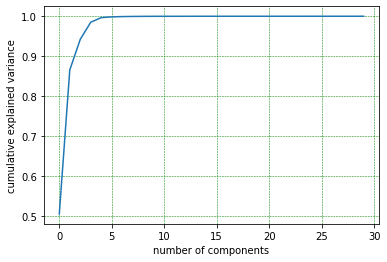

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#pca done for the whole data

X=df_onehot[['East', 'West', 'North', 'South', 'North-East', 'North-West', 'South-East', 'South-West', 'None',  'Temp Avg',	'Temp Low',	'Temp High', 'Hum Avg',	'Hum Low',	'Hum High',	'Baro Avg',	'Baro Low',	'Baro High',	'Windspeed',	'Gust',	'Wind Direction', 'Interval Precip',	'Inside Temp Avg',	'Inside Temp Low',	'Inside Temp High',	'Heat Index',	'Wind Chill',	'Dew Point',	'Station Voltage',	'wetbulb']]
y=df_onehot[['Complaint total']]

pca = PCA().fit(X)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df1 = df[['DateTime interval', 'Complaint total', 'Temp Avg','Baro Avg', 'Windspeed','Gust','Wind Direction', 'Hum Avg' ]]
df1['Complaint total'] = df1['Complaint total'].apply(lambda x : int(x))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DateTime interval,Complaint total,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg
0,2020-09-02 19:00:00,3,75.5900,29.8200,0.000000,0.000,135.00,61.00
1,2020-09-02 20:00:00,1,75.1300,29.8000,0.000000,0.000,135.00,61.00
2,2020-09-02 21:00:00,0,74.7200,29.7900,0.000000,0.000,135.00,61.00
3,2020-09-02 22:00:00,1,74.3300,29.7800,0.000000,0.000,135.00,62.00
4,2020-09-02 23:00:00,0,74.1100,29.7600,0.000000,0.000,135.00,62.00
...,...,...,...,...,...,...,...,...
7736,2021-07-23 04:00:00,0,61.1050,30.0825,1.388335,4.250,253.00,86.50
7737,2021-07-23 05:00:00,0,60.4850,30.0850,1.231668,3.625,264.50,88.25
7738,2021-07-23 06:00:00,0,60.5300,30.0950,1.045000,3.775,252.75,88.00
7739,2021-07-23 07:00:00,0,61.1050,30.1075,0.692085,3.350,263.75,86.50


In [ ]:
x = list(df1['Complaint total'].unique())
x.sort()
x
print("All unique complaint total values are {}".format(x))



All unique complaint total values are [0, 1, 2, 3, 4, 5, 6, 8, 9]


In [ ]:
#plt.rcParams['figure.figsize']=(10,10)
#custom_color = sns.color_palette("husl", 9) 
#sns.pairplot(data=df1, x_vars =['DateTime interval'], y_vars=['Temp Avg','Baro Avg', 'Windspeed','Gust','Wind Direction'], palette=custom_color, hue='Complaint total', size=10)

In [ ]:
#df1_no_zeros = df1[df1['Complaint total'] > 0]
#plt.rcParams['figure.figsize']=(10,10)
#custom_color = sns.color_palette("husl", 8)
#sns.pairplot(data=df1_no_zeros, x_vars =['DateTime interval'], y_vars=['Temp Avg','Baro Avg', 'Windspeed','Gust','Wind Direction'], palette=custom_color, hue='Complaint total', size=10)

In [ ]:
df2 = df[['Complaint total', 'Temp Avg','Baro Avg', 'Windspeed','Gust','Wind Direction', 'Hum Avg' ,'Heat Index','Dew Point']]
df2

,Complaint total,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg,Heat Index,Dew Point
0,3.0,75.5900,29.8200,0.000000,0.000,135.00,61.00,75.5900,61.200
1,1.0,75.1300,29.8000,0.000000,0.000,135.00,61.00,75.1300,60.700
2,0.0,74.7200,29.7900,0.000000,0.000,135.00,61.00,74.7200,60.500
3,1.0,74.3300,29.7800,0.000000,0.000,135.00,62.00,74.3300,60.400
4,0.0,74.1100,29.7600,0.000000,0.000,135.00,62.00,74.1100,60.200
...,...,...,...,...,...,...,...,...,...
7736,0.0,61.1050,30.0825,1.388335,4.250,253.00,86.50,61.1050,57.025
7737,0.0,60.4850,30.0850,1.231668,3.625,264.50,88.25,60.4850,57.000
7738,0.0,60.5300,30.0950,1.045000,3.775,252.75,88.00,60.5300,57.025
7739,0.0,61.1050,30.1075,0.692085,3.350,263.75,86.50,61.1050,57.050


In [ ]:
#df2.insert(0, column='target complaints', value=None)
#condition_list = [df2['Complaint total'] == 1.0, df2['Complaint total'] == 0.0  ]    
#choicelist = [1,0]
  
#df2['target complaints'] = np.select(condition_list, choicelist) #adding the cardinal direction column

In [ ]:
df2['target complaints'] = df2['Complaint total'].apply(lambda x : int(x))
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Complaint total,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg,Heat Index,Dew Point,target complaints
0,3.0,75.5900,29.8200,0.000000,0.000,135.00,61.00,75.5900,61.200,3
1,1.0,75.1300,29.8000,0.000000,0.000,135.00,61.00,75.1300,60.700,1
2,0.0,74.7200,29.7900,0.000000,0.000,135.00,61.00,74.7200,60.500,0
3,1.0,74.3300,29.7800,0.000000,0.000,135.00,62.00,74.3300,60.400,1
4,0.0,74.1100,29.7600,0.000000,0.000,135.00,62.00,74.1100,60.200,0
...,...,...,...,...,...,...,...,...,...,...
7736,0.0,61.1050,30.0825,1.388335,4.250,253.00,86.50,61.1050,57.025,0
7737,0.0,60.4850,30.0850,1.231668,3.625,264.50,88.25,60.4850,57.000,0
7738,0.0,60.5300,30.0950,1.045000,3.775,252.75,88.00,60.5300,57.025,0
7739,0.0,61.1050,30.1075,0.692085,3.350,263.75,86.50,61.1050,57.050,0


In [ ]:
df3=df2[['Temp Avg','Baro Avg', 'Windspeed','Gust','Wind Direction', 'Hum Avg' ,'Heat Index','Dew Point','target complaints']]
df3['target complaints']=df3['target complaints'].apply(lambda y : convert_complaint_yes_no(y) )
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg,Heat Index,Dew Point,target complaints
0,75.5900,29.8200,0.000000,0.000,135.00,61.00,75.5900,61.200,1
1,75.1300,29.8000,0.000000,0.000,135.00,61.00,75.1300,60.700,1
2,74.7200,29.7900,0.000000,0.000,135.00,61.00,74.7200,60.500,0
3,74.3300,29.7800,0.000000,0.000,135.00,62.00,74.3300,60.400,1
4,74.1100,29.7600,0.000000,0.000,135.00,62.00,74.1100,60.200,0
...,...,...,...,...,...,...,...,...,...
7736,61.1050,30.0825,1.388335,4.250,253.00,86.50,61.1050,57.025,0
7737,60.4850,30.0850,1.231668,3.625,264.50,88.25,60.4850,57.000,0
7738,60.5300,30.0950,1.045000,3.775,252.75,88.00,60.5300,57.025,0
7739,61.1050,30.1075,0.692085,3.350,263.75,86.50,61.1050,57.050,0


In [ ]:
df3=df3.dropna()

In [ ]:
df3

,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg,Heat Index,Dew Point,target complaints
0,75.5900,29.8200,0.000000,0.000,135.00,61.00,75.5900,61.200,1
1,75.1300,29.8000,0.000000,0.000,135.00,61.00,75.1300,60.700,1
2,74.7200,29.7900,0.000000,0.000,135.00,61.00,74.7200,60.500,0
3,74.3300,29.7800,0.000000,0.000,135.00,62.00,74.3300,60.400,1
4,74.1100,29.7600,0.000000,0.000,135.00,62.00,74.1100,60.200,0
...,...,...,...,...,...,...,...,...,...
7736,61.1050,30.0825,1.388335,4.250,253.00,86.50,61.1050,57.025,0
7737,60.4850,30.0850,1.231668,3.625,264.50,88.25,60.4850,57.000,0
7738,60.5300,30.0950,1.045000,3.775,252.75,88.00,60.5300,57.025,0
7739,61.1050,30.1075,0.692085,3.350,263.75,86.50,61.1050,57.050,0


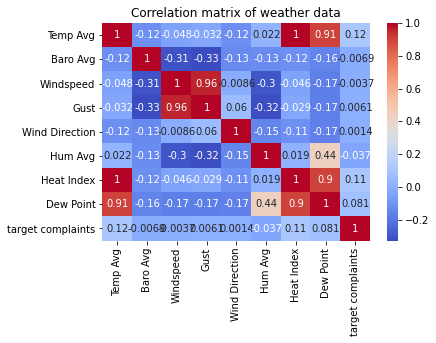

In [ ]:
#correlation matrix

corrMatrix = df3.corr()
sns.heatmap(corrMatrix, annot=True, cmap= 'coolwarm')
plt.title("Correlation matrix of weather data")
plt.show()

In [ ]:
import statsmodels.api as sm

X = df3[['Temp Avg','Hum Avg', 'Heat Index','Dew Point']].copy()
X = sm.add_constant(X)
y = df3['target complaints']

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      target complaints   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     56.82
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.52e-47
Time:                        15:57:11   Log-Likelihood:                -2304.7
No. Observations:                7739   AIC:                             4619.
Df Residuals:                    7734   BIC:                             4654.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9178      0.107     -8.576      0.0

In [ ]:
def convert_complaint_yes_no(val : int):
  if val != 0:
    return 1
  else:
    return 0

In [ ]:
#logistic
df3_copy = df3.copy() 
df3_copy['target complaints'] = df3_copy['target complaints'].apply(lambda y : convert_complaint_yes_no(y) )
display(df3_copy)
y=df3_copy[['target complaints']]
X = df3_copy[['Temp Avg', 'Hum Avg' ,'Heat Index','Dew Point']]
X = sm.add_constant(X)
logit_mod = sm.Logit(y,X)
logit_res = logit_mod.fit()
print(logit_res.summary())

,Temp Avg,Baro Avg,Windspeed,Gust,Wind Direction,Hum Avg,Heat Index,Dew Point,target complaints
0,75.5900,29.8200,0.000000,0.000,135.00,61.00,75.5900,61.200,1
1,75.1300,29.8000,0.000000,0.000,135.00,61.00,75.1300,60.700,1
2,74.7200,29.7900,0.000000,0.000,135.00,61.00,74.7200,60.500,0
3,74.3300,29.7800,0.000000,0.000,135.00,62.00,74.3300,60.400,1
4,74.1100,29.7600,0.000000,0.000,135.00,62.00,74.1100,60.200,0
...,...,...,...,...,...,...,...,...,...
7736,61.1050,30.0825,1.388335,4.250,253.00,86.50,61.1050,57.025,0
7737,60.4850,30.0850,1.231668,3.625,264.50,88.25,60.4850,57.000,0
7738,60.5300,30.0950,1.045000,3.775,252.75,88.00,60.5300,57.025,0
7739,61.1050,30.1075,0.692085,3.350,263.75,86.50,61.1050,57.050,0


Optimization terminated successfully.
         Current function value: 0.364092
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      target complaints   No. Observations:                 7739
Model:                          Logit   Df Residuals:                     7734
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.03341
Time:                        15:57:11   Log-Likelihood:                -2817.7
converged:                       True   LL-Null:                       -2915.1
Covariance Type:            nonrobust   LLR p-value:                 5.014e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4325      0.892    -10.571      0.000     -11.181      -7.684
Temp Avg       0.4871      0.

**From the above cell we infer that the columns 'Temp Avg','Windspeed','Gust','Hum Avg' ,'Heat Index','Dew Point' are effecting the target complaints.Hence we keep this and make a predicting model using logistic regression.**

In [ ]:
#model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5, max_iter=1000) #c is regularization parameter
lr.fit(X, y)
y_pred = lr.predict(X) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l2'],'C':[1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]} #pre defined dictionary for logistic model
grid = GridSearchCV(lr, param_grid = grid_values,scoring = 'recall',cv=7) #lr=model object
grid.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=100000.0, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
grid.best_params_ 

{'C': 1, 'penalty': 'l2'}

In [ ]:
lr = LogisticRegression(C=1) #c is regularization parameter
lr.fit(X, y)
y_pred = lr.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=y, y_pred=y_pred))

Accuracy: 0.875


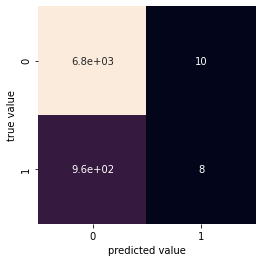

In [ ]:
#model evaluation

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(y, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=y, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y, y_pred=y_pred))

Accuracy: 0.875
Precision: 0.444
Recall: 0.008
F1: 0.016


In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

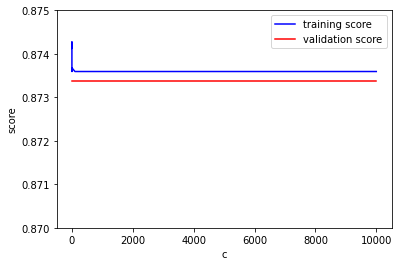

In [ ]:
#validation curve 


from sklearn.model_selection import validation_curve

param_range = [1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train_score, val_score = validation_curve(lr, X_train, y_train, cv=18,param_name='C', param_range=param_range)


plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.870, 0.875)
plt.xlabel('c')
plt.ylabel('score')
plt.show()

In [ ]:
def boxplot(y):
   plt.figure(figsize=(10, 10))
   sns.boxplot(data=df3, x= "target complaints", y=y)

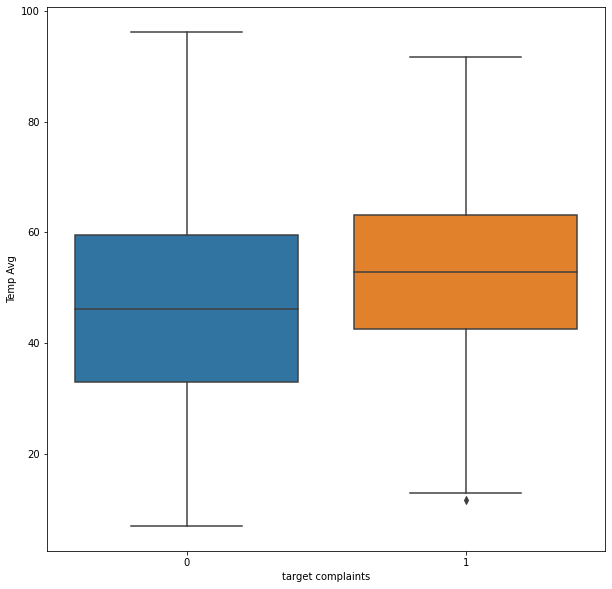

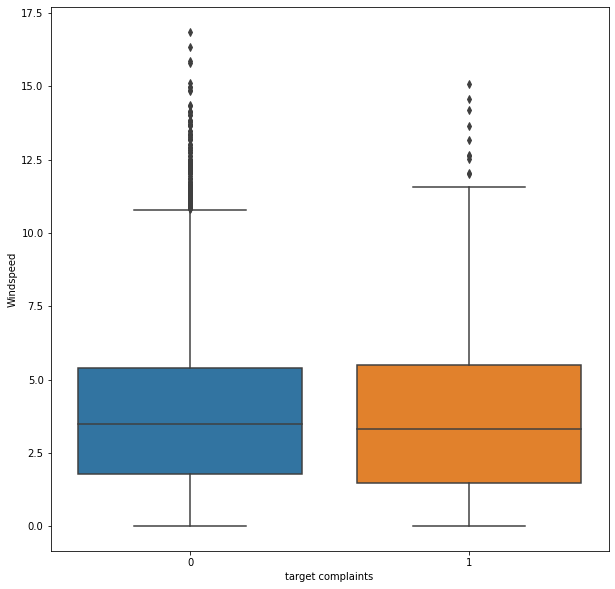

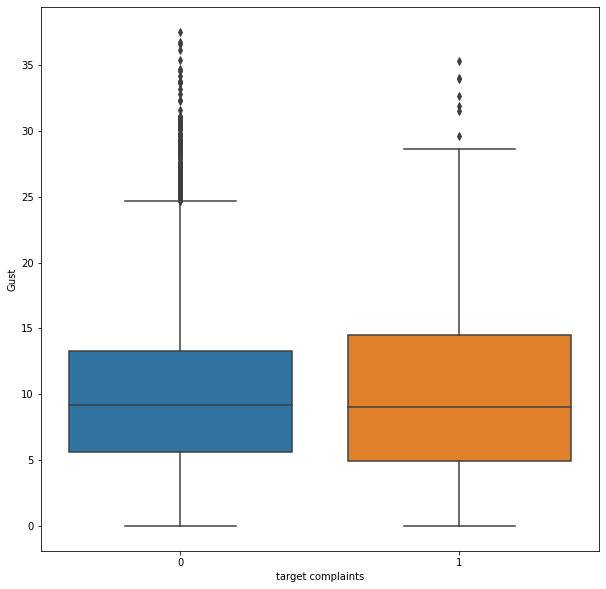

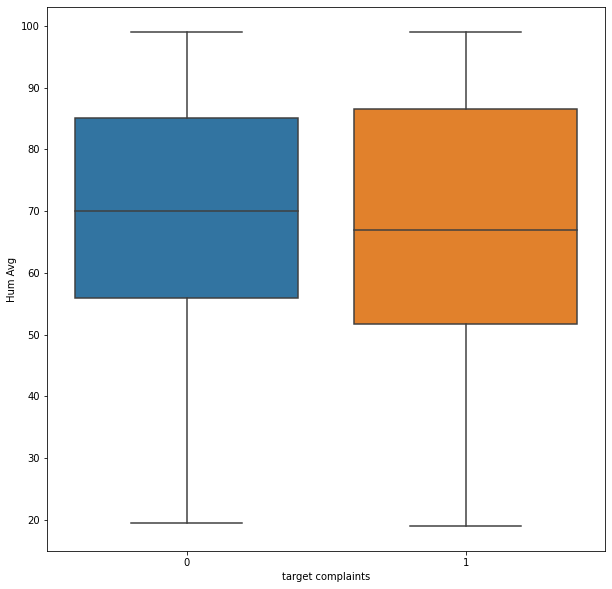

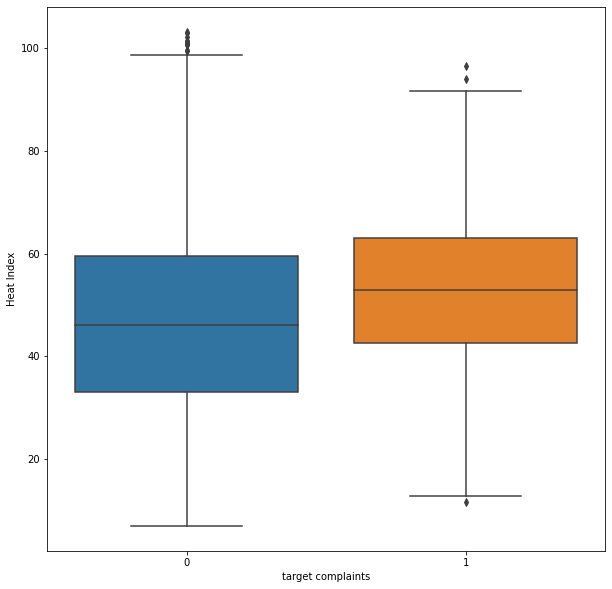

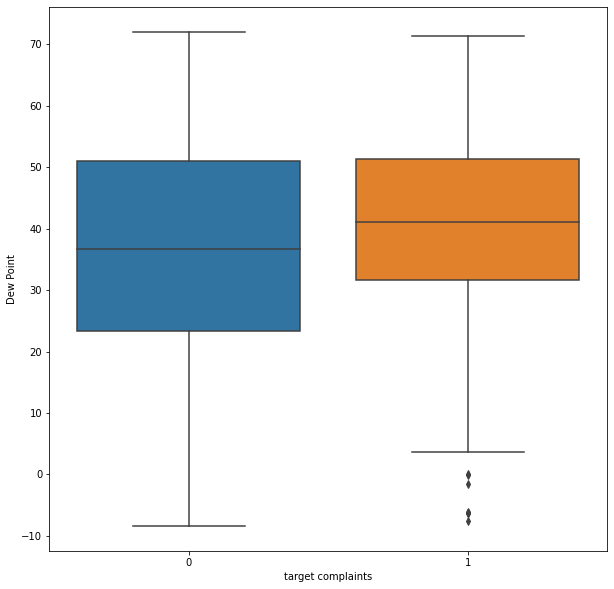

In [ ]:
boxplot("Temp Avg")
boxplot("Windspeed")
boxplot("Gust")
boxplot("Hum Avg")
boxplot("Heat Index")
boxplot("Dew Point")

In [ ]:
def violinplot(y):
   plt.figure(figsize=(10, 10))
   sns.violinplot(data=df3_copy,x="target complaints", y=y, palette='Dark2')
   plt.xlabel("complaints (0-No, 1-Yes)")


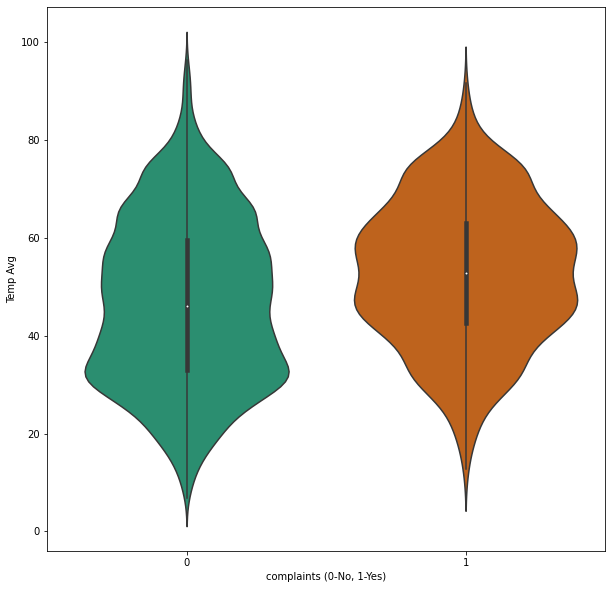

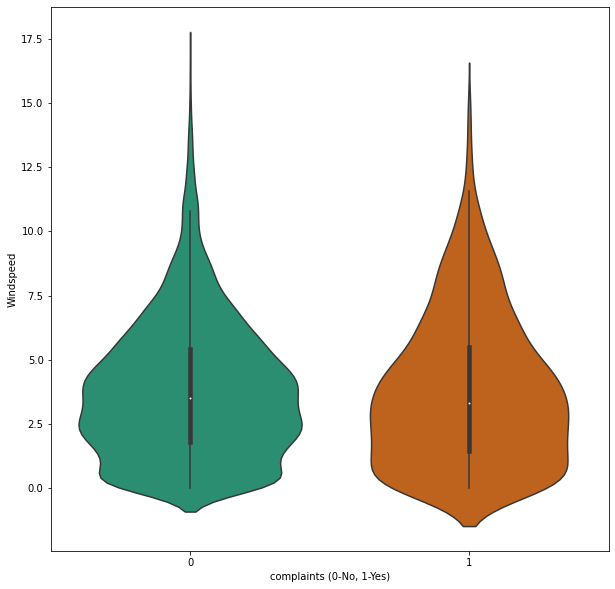

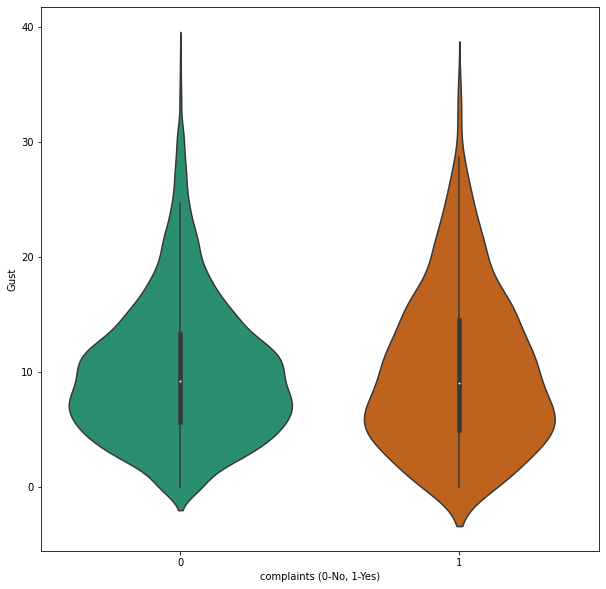

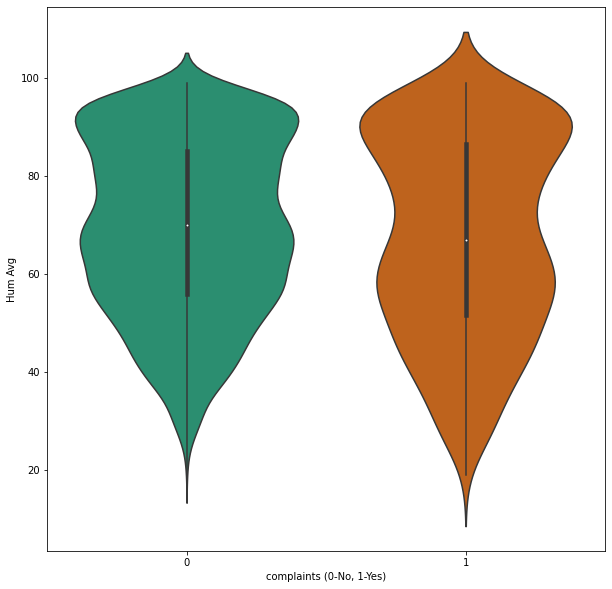

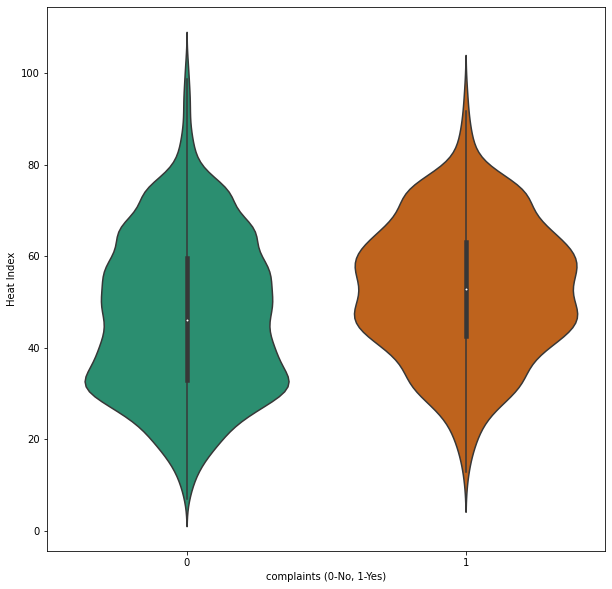

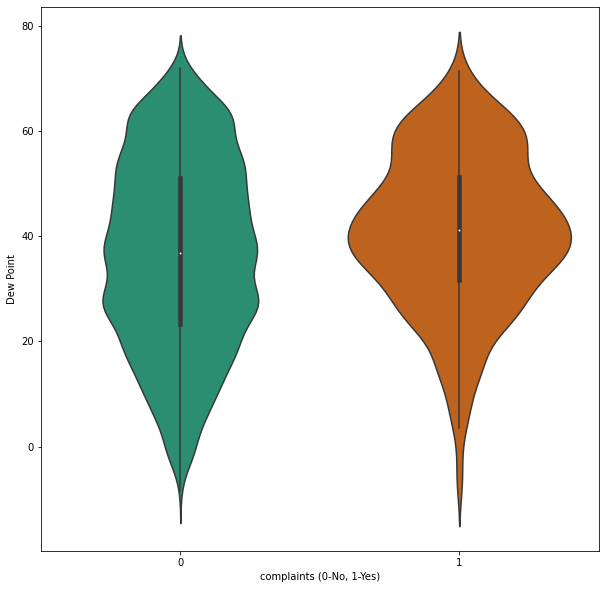

In [ ]:
violinplot("Temp Avg")
violinplot("Windspeed")
violinplot("Gust")
violinplot("Hum Avg")
violinplot("Heat Index")
violinplot("Dew Point")

In [ ]:
df4=df[["Complaint total",	"Hour Group",	"Day_of_week",	"Month_of_year",	"Season"]]

df4['Complaint total'] = df4['Complaint total'].apply(np.int64) #converting float to int
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Complaint total,Hour Group,Day_of_week,Month_of_year,Season
0,3,19:00:00,Wednesday,September,Fall
1,1,20:00:00,Wednesday,September,Fall
2,0,21:00:00,Wednesday,September,Fall
3,1,22:00:00,Wednesday,September,Fall
4,0,23:00:00,Wednesday,September,Fall
...,...,...,...,...,...
7736,0,04:00:00,Friday,July,Summer
7737,0,05:00:00,Friday,July,Summer
7738,0,06:00:00,Friday,July,Summer
7739,0,07:00:00,Friday,July,Summer


In [ ]:
#PLEASE SEE FOLLOWING TEXT BLOCK FOR EXPLANATION OF THIS CODE CELL!!!
#@title 
'''
Purpose: A helper function to get_complaint_df 
    Fills the missing time intervals in the master smell df.
    The missing time intervals will have pd.Na for all columns
@param smell_master_df : the master smell df
@return df with the missing time intervals
'''
def smell_fill_dt_gaps(smell_master):
    df_copy = smell_master.copy()
    df_copy['Date & time (hour rounded)'] = pd.to_datetime(df_copy['Date & time (hour rounded)'])
    min_dt = df_copy['Date & time (hour rounded)'].min()
    max_dt = df_copy['Date & time (hour rounded)'].max()
  
    #make array from one hour to the next in date range
    array_all_dt = np.arange(min_dt, max_dt, timedelta(hours=1)).astype(datetime)
    df = pd.DataFrame(array_all_dt, columns = ['Date & time (hour rounded)'] )
    
    df_merged = pd.merge(df_copy,df, how='outer', on='Date & time (hour rounded)') 
    df_merged = df_merged.drop_duplicates(subset=['Date & time (hour rounded)'])
    df_merged = df_merged.sort_values(by=['Date & time (hour rounded)'])
    df_merged = df_merged.reset_index(drop=True)
    
    return df_merged

'''
Purpose: The smell master data contains only datetimes where total complaint = 1
    Since there isn't a complaint every hour, we are missing datetimes where 
    there are no complaints.
    Therefore we need to fill in the gaps in the data ranges so we can get
    the datetime rows where there were no complaints. This function
    will fill the missing dates in the smell master df and return a df
    containing only Datetime interval, Hour Group, Day_of_week, Month_of_year,
    Season, and Complaint total.
@param smell_master : the master smell df
@return: a df with the only the columns: Datetime interval, 
    Hour Group, Day_of_week, Month_of_year, Season, and Complaint total
'''
def get_complaint_df(smell_master_df):
    smell_copy = smell_fill_dt_gaps(smell_master_df)
    
    seasons_dict = create_season_dict()
    
    smell_copy.insert(loc=1, column='Day_of_week',value= 5)
    smell_copy.insert(loc=2, column='Month_of_year',value= 5)
    smell_copy.insert(loc=3, column='Season',value= 5)
    smell_copy['Day_of_week'] = smell_copy['Date & time (hour rounded)'].dt.day_name()
 
    smell_copy['Month_of_year'] = smell_copy['Date & time (hour rounded)'].apply(lambda x: x.strftime('%B'))
    smell_copy['Season'] = smell_copy['Month_of_year'].apply(lambda y : seasons_dict[y])
    
    smell_copy.insert(loc=1, column = 'Hour Group', value=5)
    smell_copy['Hour Group'] = smell_copy['Date & time (hour rounded)'].dt.time
    
    col_keep = ['Date & time (hour rounded)','Hour Group', 'Day_of_week', 'Month_of_year','Season', 'Complaint total']
    total_col = list(smell_copy.columns)
    
    for i in total_col:
        if i not in col_keep:
            smell_copy.pop(i)
    
    smell_copy['Complaint total'].fillna(value=0, inplace=True)
    
    smell_copy['Complaint total'] = smell_copy['Complaint total'].apply(lambda x : int(x))
    
    smell_copy = smell_copy.sort_values(by=['Date & time (hour rounded)'])
    
    smell_copy = smell_copy.reset_index(drop=True)
    
    smell_copy =smell_copy.rename(columns={'Date & time (hour rounded)': 'DateTime interval'})
    return smell_copy
    

The most important function that we will be relying upon in the above code cell is get_complaint_df(smell_master_df). The rest are helper functions.  

 This function will return a dataframe with the columns Datetime interval, Hour Group, Day_of_week, Month_of_year, Season, and Complaint total in hour intervals. This differs from get_merged_trimmed because it contains all the date ranges of the smell_master/smell complaint dataframe. The weather event (so far) only covers the date range from 09/2020 - 09/2021. The smell dataframe goes back as far as 2019. 
 
It does NOT contain any weather data. This function will be useful for seasonal/weekday analysis.

In [ ]:
df4 = get_complaint_df(df_stinky_master)
df4

,DateTime interval,Hour Group,Day_of_week,Month_of_year,Season,Complaint total
0,2019-05-22 09:00:00,09:00:00,Wednesday,May,Spring,1
1,2019-05-22 10:00:00,10:00:00,Wednesday,May,Spring,0
2,2019-05-22 11:00:00,11:00:00,Wednesday,May,Spring,0
3,2019-05-22 12:00:00,12:00:00,Wednesday,May,Spring,0
4,2019-05-22 13:00:00,13:00:00,Wednesday,May,Spring,0
...,...,...,...,...,...,...
19027,2021-07-23 04:00:00,04:00:00,Friday,July,Summer,0
19028,2021-07-23 05:00:00,05:00:00,Friday,July,Summer,0
19029,2021-07-23 06:00:00,06:00:00,Friday,July,Summer,0
19030,2021-07-23 07:00:00,07:00:00,Friday,July,Summer,0


In [ ]:
df4['Month_of_year'].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [ ]:
df_group_month=df4.groupby(['Month_of_year'])['Complaint total'].sum()
df_group_month=df_group_month.reset_index()
df_group_month


,Month_of_year,Complaint total
0,April,216
1,August,253
2,December,69
3,February,15
4,January,29
5,July,300
6,June,325
7,March,127
8,May,311
9,November,156


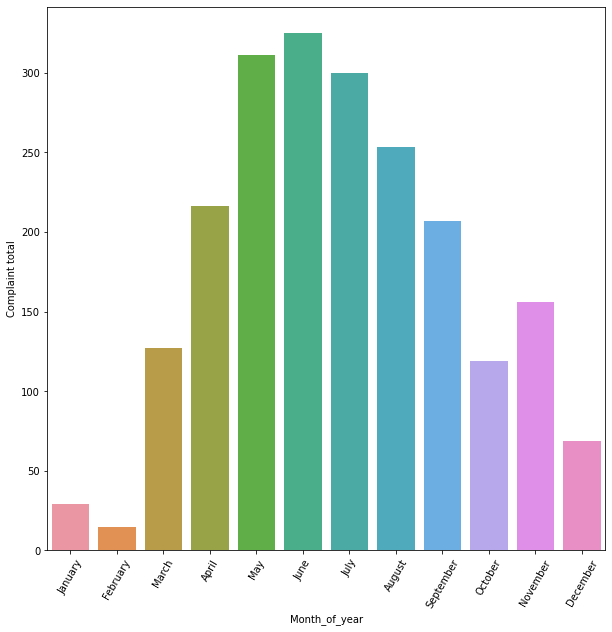

In [ ]:
#TODO: make color palette so seasonal months match each other in chart
plt.figure(figsize=(10, 10))
Months = ['January', 'February', 'March', 'April', 'May', 
         'June', 'July', 'August', 'September', 'October',
          'November', 'December']
sns.barplot(data=df_group_month,x='Month_of_year',y='Complaint total',order=Months)
plt.xticks(rotation=60)
plt.show()

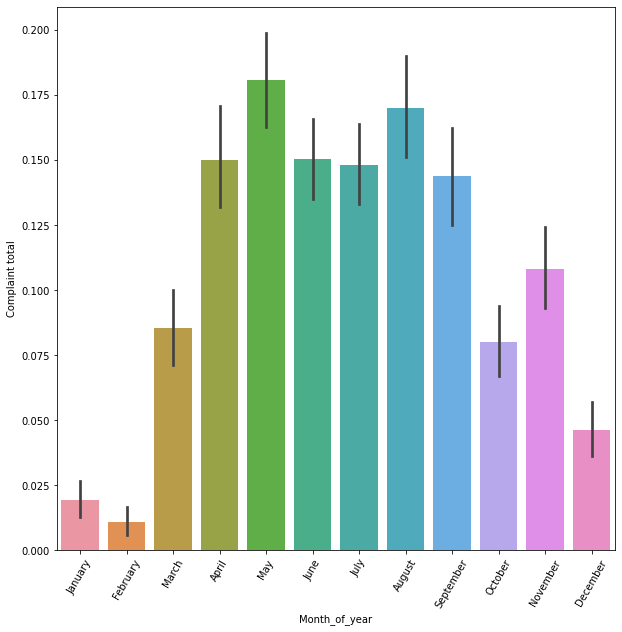

In [ ]:
plt.figure(figsize=(10, 10))
Months = ['January', 'February', 'March', 'April', 'May', 
         'June', 'July', 'August', 'September', 'October',
          'November', 'December']
sns.barplot(data=df4,x='Month_of_year',y='Complaint total',order=Months)
plt.xticks(rotation=60)
plt.show()

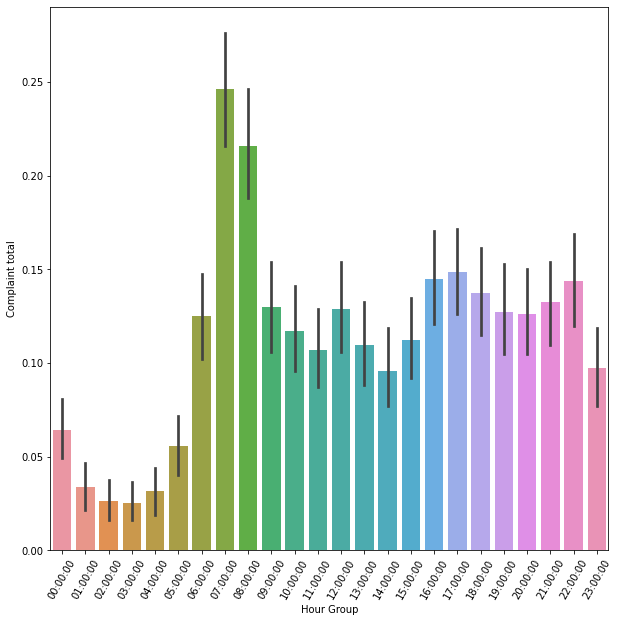

In [ ]:
#look at complaints bby hour groups
plt.figure(figsize=(10, 10))
list_hour_groups = list(df4['Hour Group'].unique())
list_hour_groups.sort()
sns.barplot(data=df4,x='Hour Group',y='Complaint total', order = list_hour_groups)
plt.xticks(rotation=60)
plt.show()

In [ ]:
df_day_of_week=df4.groupby(['Day_of_week'])['Complaint total'].sum()
df_day_of_week=df_day_of_week.reset_index()
df_day_of_week

,Day_of_week,Complaint total
0,Friday,301
1,Monday,335
2,Saturday,308
3,Sunday,272
4,Thursday,306
5,Tuesday,299
6,Wednesday,306


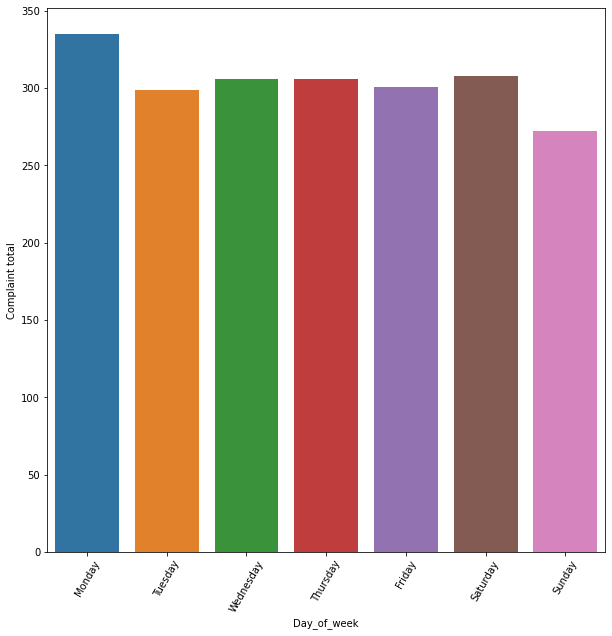

In [ ]:
plt.figure(figsize=(10, 10))
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data=df_day_of_week,x='Day_of_week',y='Complaint total',order=Days)
plt.xticks(rotation=60)
plt.show()

In [ ]:
df_group_season=df4.groupby(['Season'])['Complaint total'].sum()
df_group_season=df_group_season.reset_index()
df_group_season

,Season,Complaint total
0,Fall,482
1,Spring,654
2,Summer,878
3,Winter,113


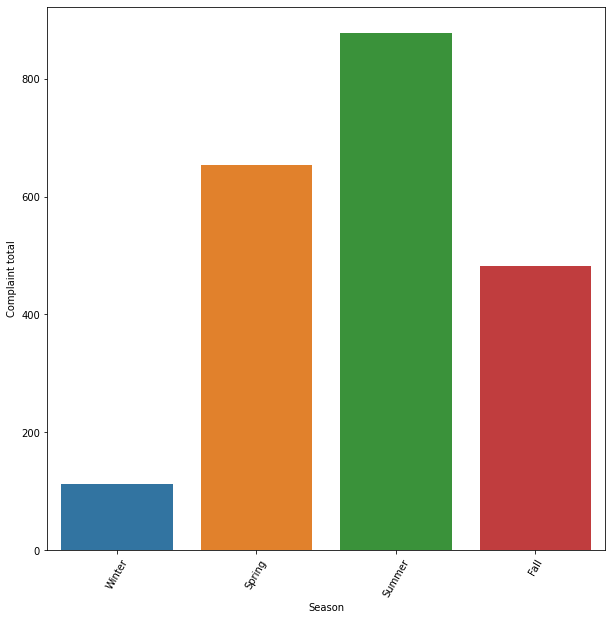

In [ ]:
plt.figure(figsize=(10, 10))
seasons = ['Winter','Spring','Summer','Fall']
sns.barplot(data=df_group_season,x='Season',y='Complaint total',order=seasons)
plt.xticks(rotation=60)
plt.show()

In [ ]:
df_cardinal_model = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours')
df_cardinal_model=df_cardinal_model[['Cardinal Direction','Complaint total']]
df_cardinal_model['Complaint total']=df_cardinal_model['Complaint total'].apply(np.int64)
df_cardinal_model


,Cardinal Direction,Complaint total
0,South-East,3
1,South-East,1
2,South-East,0
3,South-East,1
4,South-East,0
...,...,...
7736,South-West,0
7737,West,0
7738,None,0
7739,None,0


In [ ]:
def temp(val):
  if type(val) != str:
    return 'None'
  else:
    return val

In [ ]:
df_cardinal_model['Cardinal Direction'] = df_cardinal_model['Cardinal Direction'].apply(lambda x: temp(x))
df_cardinal_model['Cardinal Direction'].unique()
df_no_zero = df_cardinal_model[df_cardinal_model['Complaint total'] != 0]

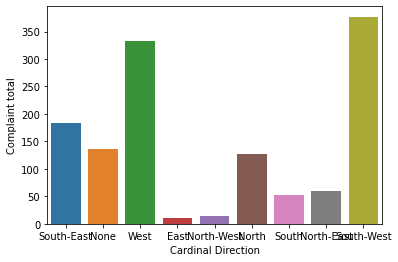

In [ ]:
df_group_cardinal=df_cardinal_model.groupby(by=['Cardinal Direction']).sum()
df_group_cardinal=df_group_cardinal.reset_index()
df_group_cardinal
sns.barplot(data=df_group_cardinal, x='Cardinal Direction', y='Complaint total')
sns.barplot(data=df_no_zero , x='Cardinal Direction', y='Complaint total')


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_by_hours = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours')
df_by_day = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'days')

In [ ]:
#PLEASE SEE FOLLOWING TEXT BLOCK FOR EXPLANATION OF THIS CODE CELL!!!
#@title 
'''
Purpose: To create a datetime object from date values as integers
This is a helper function to get_weather_info_helper
@param day_int : an integer representing the numerical day
@param month_int : an integer representing the numerical month i.e. January is 1
@param year_int : the year represented as a 4 digit integer i.e. 2020
@param time : A boolean, set to False by default. Set true if looking at a particular hour
@param hour_int : an integer representing the hour in military time (0-23) where 23 = 11:OO PM
@ return : a datetime object representing the data values entered

'''
def convert_val_to_dt(day_int, month_int, year_int, time = False, hour_int = 0):
    if time == False:
        x = datetime(year = year_int, month = month_int, day = day_int, hour = 0, minute = 0, second = 0, microsecond = 0)
    else:
        x = datetime(year = year_int, month = month_int, day = day_int, hour = hour_int, minute = 0, second = 0, microsecond = 0)
    return x

'''
Purpose: A helper function to get_weather_info_by_dt
Creates a dictionary of weather info for the date you want to look at
@param df : a datframe used to extract weather information from. 
if hours = False, (it is by default False) please use a dataframe that looks at hour intervals
i.e. the return value of get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours')
else if hours = True, please use a dataframe that looks at day intervals
i.e. return value of get_merged_trimmed_df(df_weather_master, df_stinky_master, 'days')
@param dt : a datetime object representing the date you want to investigate weather events
@ param hours: a boolean, set to False by default. Effects the df param you can use
- please see @param df
@ param hour_int : an integer representing the hour in a 24 hour military time. 
i.e. to investigate values at 1:00 AM use hour_int = 1 
to investigate values at 1:OO PM use hour_int = 13 (as in 13:00)
set to 0 (i.e. midnight / 12:00 am) by default
@return a dictionary containing the columns of the df as keys
and the values as the value of the weather even
'''
def get_weather_info_helper(df, dt, hours = False, hour_int = 0):
  
    
    if hours == False:
        temp_df = df[df['DateTime interval'] == dt]

        all_dts = pd.Series(df['DateTime interval']).array
        min_dt = all_dts.min()
        min_dt_str = min_dt.strftime('%Y-%B-%d')
        max_dt = all_dts.max()
        max_dt_str = max_dt.strftime('%Y-%B-%d')

        dt_str = dt.strftime('%Y-%B-%d')

        if dt not in all_dts:
          raise ValueError('ERROR: {} is not within the date range available.\n \
          Date selected must be between {} and {} '.format(dt_str, min_dt_str, max_dt_str))

        temp_df = pd.melt(temp_df, id_vars = ['DateTime interval'], value_vars = ['Complaint total','Day_of_week',
                                                                                  'Month_of_year','Season','Temp Avg',
                                                                                  'Temp Low','Temp High','Hum Avg',
                                                                                  'Hum Low','Hum High','Baro Avg',
                                                                                  'Baro Low','Baro High','Windspeed','Gust',
                                                                                  'Wind Direction','Cardinal Direction',
                                                                                  'Interval Precip','Inside Temp Avg',
                                                                                  'Inside Temp Low','Inside Temp High',
                                                                                  'Heat Index','Wind Chill','Dew Point',
                                                                                  'Station Voltage','wetbulb'])
    else:
        temp_df = df[df['DateTime interval'] == dt]

        all_dts = pd.Series(df['DateTime interval']).array
        min_dt = all_dts.min()
        max_dt = all_dts.max()
        if dt not in all_dts:
          raise ValueError('ERROR: {} is not within the date range available.\n \
          Date selected must be between {} and {} '.format(dt, min_dt, max_dt))

        temp_df = pd.melt(temp_df, id_vars = ['DateTime interval'], value_vars = ['Hour Group','Complaint total','Day_of_week',
                                                                                  'Month_of_year','Season','Temp Avg',
                                                                                  'Temp Low','Temp High','Hum Avg',
                                                                                  'Hum Low','Hum High','Baro Avg',
                                                                                  'Baro Low','Baro High','Windspeed','Gust',
                                                                                  'Wind Direction','Cardinal Direction',
                                                                                  'Interval Precip','Inside Temp Avg',
                                                                                  'Inside Temp Low','Inside Temp High',
                                                                                  'Heat Index','Wind Chill','Dew Point',
                                                                                  'Station Voltage','wetbulb'])
        
    dict_val = temp_df.set_index('variable').to_dict()['value']
    return dict_val

'''
Purpose: Return a dictionary of weather events as keys and weather values as values
based on the date you want to investigate
@param df : the dataframe used for investigation of weather events
@param day : day as an int (0-31)
@param month : month as integer (1-12)
@param year : year as a 4 digit integer i.e. 2020 or 2021
@param time :a boolean, set to False by default. Effects the df param you can use
- please see @param df
@param hour : an integer representing the hour in a 24 hour military time. 
i.e. to investigate values at 1:00 AM use hour_int = 1 
to investigate values at 1:OO PM use hour_int = 13 (as in 13:00)
set to 0 (i.e. midnight / 12:00 am) by default
@return : a dictionary of weather events/values of the date you want to investigate
'''
def get_weather_info_by_dt(df, day, month, year, time= False, hour = 0):
    if time == False:
        dt = convert_val_to_dt(day, month, year)
        dict_weather = get_weather_info_helper(df, dt)
    else:
        dt = convert_val_to_dt(day, month, year, time = True, hour_int = hour)
        dict_weather = get_weather_info_helper(df, dt, hours = True, hour_int = hour)
    
    return dict_weather

The most important function that we will be relying upon in the above code cell is is 'get_weather_info_by_dt(df, day, month, year, time= False, hour = 0)'. The rest are helper functions. This will return a dictionary of weather values based on the parameters passed.

The 'df' param the user must pass in is dependent on whether the user wants to do a daily or by hour analysis.  

If doing a day by day analysis please use the return value of get_merged_trimmed_df(df_weather_master, df_stinky_master, 'days'). We intialized this df as variable called in 'df_by_day' in a previous code block.

If doing an hour by hour analysis please passed in the return value of df_by_hours = get_merged_trimmed_df(df_weather_master, df_stinky_master, 'hours'). We initialized this df as a variable called 'df_by_hours' in a previous code block.

In [ ]:
get_weather_info_by_dt(df_by_day, 11, 11, 2020)

{'Baro Avg': 29.951666666666668,
 'Baro High': 29.95958333333333,
 'Baro Low': 29.943749999999998,
 'Cardinal Direction': 'South',
 'Complaint total': 11.0,
 'Day_of_week': 'Wednesday',
 'Dew Point': 57.61250000000001,
 'Gust': 9.725,
 'Heat Index': 62.13208333333335,
 'Hum Avg': 85.5,
 'Hum High': 87.125,
 'Hum Low': 84.16666666666667,
 'Inside Temp Avg': 69.13458333333334,
 'Inside Temp High': 69.54166666666667,
 'Inside Temp Low': 68.70833333333333,
 'Interval Precip': 0.0,
 'Month_of_year': 'November',
 'Season': 'Fall',
 'Station Voltage': 6.739750000000001,
 'Temp Avg': 62.13208333333335,
 'Temp High': 63.07916666666669,
 'Temp Low': 61.12500000000002,
 'Wind Chill': 62.12916666666666,
 'Wind Direction': 210.375,
 'Windspeed': 3.6895641666666665,
 'wetbulb': 59.32499999999999}

In [ ]:
#Hani use as template for masking
x = df_stinky_master.copy()
dtobj0213202 = convert_val_to_dt(13,2,2020)
dtobj= convert_val_to_dt(10,3,2020)
x['Date & time (hour rounded)'] = pd.to_datetime(x['Date & time (hour rounded)'])
y = x[x['Date & time (hour rounded)'] > dtobj0213202]
y = y[y['Date & time (hour rounded)'] < dtobj]
y = y.reset_index(drop=True)
y

,Date & time (hour rounded),date,time (hour rounded),Complaint total,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,time,epoch time,date & time,smell value,zipcode,symptoms,additional comments
0,2020-02-13 08:00:00,2020-02-13,08:00:00,1,7418849.0,Android,Odor,2020-02-13 08:30:00,2020-02-13 08:39:00,Archived,25 Cushman St,again,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,08:30:00,NaN,NaT,NaN,NaN,NaN,NaN
1,2020-02-24 07:00:00,2020-02-24,07:00:00,1,7462619.0,Android,Odor,2020-02-24 07:18:00,2020-02-24 08:24:00,Archived,342 Spring St,petrol/chemical smell in west end,https://crm.seeclickfix.com/#/organizations/61...,43.646920,-70.270314,City Council District 2,07:18:00,NaN,NaT,NaN,NaN,NaN,NaN
2,2020-03-02 06:00:00,2020-03-02,06:00:00,1,7492108.0,iPhone,Odor,2020-03-02 06:21:00,2020-03-02 08:38:00,Archived,55 Bowdoin St,Very potent Petrochemical/VOC odor in my back...,https://crm.seeclickfix.com/#/organizations/61...,43.647231,-70.274842,City Council District 2,06:21:00,NaN,NaT,NaN,NaN,NaN,NaN
3,2020-03-02 06:00:00,2020-03-02,06:00:00,1,7492122.0,Android,Odor,2020-03-02 06:44:00,2020-03-02 08:38:00,Archived,181 Brackett St,Worst stink from tanks. I have chronic lung co...,https://crm.seeclickfix.com/#/organizations/61...,43.651257,-70.267350,City Council District 2,06:44:00,NaN,NaT,NaN,NaN,NaN,NaN
4,2020-03-02 07:00:00,2020-03-02,07:00:00,1,7492187.0,Portal,Odor,2020-03-02 07:09:00,2020-03-02 08:38:00,Archived,15 Thomas St,NaN,https://crm.seeclickfix.com/#/organizations/61...,43.647399,-70.270398,City Council District 2,07:09:00,NaN,NaT,NaN,NaN,NaN,NaN
5,2020-03-03 07:00:00,2020-03-03,07:00:00,1,7497351.0,Web - Desktop,Odor,2020-03-03 07:38:00,2020-03-03 08:20:00,Archived,Cumberland Ave & Myrtle St,It is warmer and more humid than normal and th...,https://crm.seeclickfix.com/#/organizations/61...,43.660268,-70.257697,City Council District 1,07:38:00,NaN,NaT,NaN,NaN,NaN,NaN
6,2020-03-06 07:00:00,2020-03-06,07:00:00,1,7514195.0,Android,Odor,2020-03-06 07:29:00,2020-03-06 08:43:00,Archived,25 Cushman St,again\nLewis Cushman Reiche at least,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,07:29:00,NaN,NaT,NaN,NaN,NaN,NaN
7,2020-03-08 18:00:00,2020-03-08,18:00:00,1,7522526.0,iPhone,Odor,2020-03-08 18:34:00,2020-03-09 10:06:00,Archived,55 Bowdoin St,Petrochemical/VOC odor,https://crm.seeclickfix.com/#/organizations/61...,43.647118,-70.274848,City Council District 2,18:34:00,NaN,NaT,NaN,NaN,NaN,NaN
8,2020-02-23 10:00:00,2020-02-23,10:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,43.629600,-70.262200,NaN,10:54:19,1.582473e+09,2020-02-23 10:54:19,3.0,4106.0,NaN,NaN
9,2020-02-25 08:00:00,2020-02-25,08:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,Petroleum smell,NaN,43.635700,-70.285500,NaN,08:19:09,1.582637e+09,2020-02-25 08:19:09,4.0,4106.0,NaN,NaN


In [ ]:
#Hani use as template for masking

x = df_stinky_master.copy()
dtobj0213202 = convert_val_to_dt(13,2,2020)
dtobj= convert_val_to_dt(10,3,2020)
x['Date & time (hour rounded)'] = pd.to_datetime(x['Date & time (hour rounded)'])
y = x[x['Date & time (hour rounded)'] > dtobj0213202]
y = y[y['Date & time (hour rounded)'] < dtobj]
y = y.reset_index(drop=True)
y

,Date & time (hour rounded),date,time (hour rounded),Complaint total,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,time,epoch time,date & time,smell value,zipcode,symptoms,additional comments
0,2020-02-13 08:00:00,2020-02-13,08:00:00,1,7418849.0,Android,Odor,2020-02-13 08:30:00,2020-02-13 08:39:00,Archived,25 Cushman St,again,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,08:30:00,NaN,NaT,NaN,NaN,NaN,NaN
1,2020-02-24 07:00:00,2020-02-24,07:00:00,1,7462619.0,Android,Odor,2020-02-24 07:18:00,2020-02-24 08:24:00,Archived,342 Spring St,petrol/chemical smell in west end,https://crm.seeclickfix.com/#/organizations/61...,43.646920,-70.270314,City Council District 2,07:18:00,NaN,NaT,NaN,NaN,NaN,NaN
2,2020-03-02 06:00:00,2020-03-02,06:00:00,1,7492108.0,iPhone,Odor,2020-03-02 06:21:00,2020-03-02 08:38:00,Archived,55 Bowdoin St,Very potent Petrochemical/VOC odor in my back...,https://crm.seeclickfix.com/#/organizations/61...,43.647231,-70.274842,City Council District 2,06:21:00,NaN,NaT,NaN,NaN,NaN,NaN
3,2020-03-02 06:00:00,2020-03-02,06:00:00,1,7492122.0,Android,Odor,2020-03-02 06:44:00,2020-03-02 08:38:00,Archived,181 Brackett St,Worst stink from tanks. I have chronic lung co...,https://crm.seeclickfix.com/#/organizations/61...,43.651257,-70.267350,City Council District 2,06:44:00,NaN,NaT,NaN,NaN,NaN,NaN
4,2020-03-02 07:00:00,2020-03-02,07:00:00,1,7492187.0,Portal,Odor,2020-03-02 07:09:00,2020-03-02 08:38:00,Archived,15 Thomas St,NaN,https://crm.seeclickfix.com/#/organizations/61...,43.647399,-70.270398,City Council District 2,07:09:00,NaN,NaT,NaN,NaN,NaN,NaN
5,2020-03-03 07:00:00,2020-03-03,07:00:00,1,7497351.0,Web - Desktop,Odor,2020-03-03 07:38:00,2020-03-03 08:20:00,Archived,Cumberland Ave & Myrtle St,It is warmer and more humid than normal and th...,https://crm.seeclickfix.com/#/organizations/61...,43.660268,-70.257697,City Council District 1,07:38:00,NaN,NaT,NaN,NaN,NaN,NaN
6,2020-03-06 07:00:00,2020-03-06,07:00:00,1,7514195.0,Android,Odor,2020-03-06 07:29:00,2020-03-06 08:43:00,Archived,25 Cushman St,again\nLewis Cushman Reiche at least,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,07:29:00,NaN,NaT,NaN,NaN,NaN,NaN
7,2020-03-08 18:00:00,2020-03-08,18:00:00,1,7522526.0,iPhone,Odor,2020-03-08 18:34:00,2020-03-09 10:06:00,Archived,55 Bowdoin St,Petrochemical/VOC odor,https://crm.seeclickfix.com/#/organizations/61...,43.647118,-70.274848,City Council District 2,18:34:00,NaN,NaT,NaN,NaN,NaN,NaN
8,2020-02-23 10:00:00,2020-02-23,10:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,43.629600,-70.262200,NaN,10:54:19,1.582473e+09,2020-02-23 10:54:19,3.0,4106.0,NaN,NaN
9,2020-02-25 08:00:00,2020-02-25,08:00:00,1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,Petroleum smell,NaN,43.635700,-70.285500,NaN,08:19:09,1.582637e+09,2020-02-25 08:19:09,4.0,4106.0,NaN,NaN


In [ ]:


def map_date(start_date,end_date):
  dt = datetime.strptime(start_date, '%m-%d-%Y')
  
  dt_start = datetime.strptime(start_date, '%m-%d-%Y')
  dt_end = datetime.strptime(end_date, '%m-%d-%Y')
      
  x = df_stinky_master.copy()
  start_date_data = convert_val_to_dt(dt_start.day,dt_start.month,dt_start.year)
  
  end_date= convert_val_to_dt(dt_end.day,dt_end.month,dt_end.year)
  x['Date & time (hour rounded)'] = pd.to_datetime(x['Date & time (hour rounded)'])
  y = x[x['Date & time (hour rounded)'] > start_date_data]
  y = y[y['Date & time (hour rounded)'] < end_date]
  y = y.reset_index(drop=True)
  df_summary = y[['date','time (hour rounded)','Complaint total','Latitude'	,'Longitude']]
  return df_summary


In [ ]:
 winter_data=map_date("12-1-2020","02-28-2021")
 summer_data=map_date("05-1-2020","07-31-2020")
 

In [ ]:
winter_data

,date,time (hour rounded),Complaint total,Latitude,Longitude
0,2020-12-03,11:00:00,1,43.646042,-70.272632
1,2020-12-03,11:00:00,1,43.644630,-70.274370
2,2020-12-03,11:00:00,1,43.647764,-70.275915
3,2020-12-03,22:00:00,1,43.645964,-70.271836
4,2020-12-04,14:00:00,1,43.646182,-70.273039
...,...,...,...,...,...
94,2021-02-06,07:00:00,1,43.646700,-70.276700
95,2021-02-10,09:00:00,1,43.643900,-70.274700
96,2021-02-11,07:00:00,1,43.635200,-70.237600
97,2021-02-27,11:00:00,1,43.631500,-70.283900


In [ ]:

def make_map(map_frame):
  us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
  fig = px.scatter_mapbox(map_frame, lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
  #add spefic pods with different color 
  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

In [ ]:
make_map(summer_data)

In [ ]:
make_map(winter_data)